<h1 style="color:red;"><strong>1. Look at the big Picture</h1>

<h2 style="color:Orange;">1.1 Frame the Problems</h2>

* **What's the business objective**

* **How does the company expect to use and benefit from the model?**

* Frame problems --> chose algorithm --> performance measure --> ways/time to tune the model

<h2 style="color:Orange;">1.2 Chose performance measure (Loss)</h2>


RMSE


<h2 style="color:Orange;">1.3 Chose performance measure (Metrics)</h2>

RMSE

<h2 style="color:Orange;">1.4 Check the Assumptions</h2>


Self-Selection bias

<h1 style="color:red;"><strong>2. Get the Data</h1>

In [83]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
#-----------------------------
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df = pd.read_csv("NFWBS_PUF_2016_data.csv")

In [85]:
# Take a look at the top 5 rows
df.head()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,FWB1_4,FWB1_5,FWB1_6,FWB2_1,FWB2_2,FWB2_3,FWB2_4,FSscore,FS1_1,FS1_2,FS1_3,FS1_4,FS1_5,FS1_6,FS1_7,FS2_1,FS2_2,FS2_3,SUBKNOWL1,ACT1_1,ACT1_2,FINGOALS,PROPPLAN_1,PROPPLAN_2,PROPPLAN_3,PROPPLAN_4,MANAGE1_1,MANAGE1_2,MANAGE1_3,MANAGE1_4,SAVEHABIT,FRUGALITY,AUTOMATED_1,AUTOMATED_2,ASK1_1,ASK1_2,SUBNUMERACY2,SUBNUMERACY1,CHANGEABLE,GOALCONF,LMscore,FINKNOWL1,FINKNOWL2,FINKNOWL3,FK1correct,FK2correct,FK3correct,KHscore,KHKNOWL1,KHKNOWL2,KHKNOWL3,KHKNOWL4,KHKNOWL5,KHKNOWL6,KHKNOWL7,KHKNOWL8,KHKNOWL9,KH1correct,KH2correct,KH3correct,KH4correct,KH5correct,KH6correct,KH7correct,KH8correct,KH9correct,ENDSMEET,HOUSING,LIVINGARRANGEMENT,HOUSERANGES,IMPUTATION_FLAG,VALUERANGES,MORTGAGE,SAVINGSRANGES,PRODHAVE_1,PRODHAVE_2,PRODHAVE_3,PRODHAVE_4,PRODHAVE_5,PRODHAVE_6,PRODHAVE_7,PRODHAVE_8,PRODHAVE_9,PRODUSE_1,PRODUSE_2,PRODUSE_3,PRODUSE_4,PRODUSE_5,PRODUSE_6,CONSPROTECT1,CONSPROTECT2,CONSPROTECT3,EARNERS,VOLATILITY,SNAP,MATHARDSHIP_1,MATHARDSHIP_2,MATHARDSHIP_3,MATHARDSHIP_4,MATHARDSHIP_5,MATHARDSHIP_6,COLLECT,REJECTED_1,REJECTED_2,ABSORBSHOCK,BENEFITS_1,BENEFITS_2,BENEFITS_3,BENEFITS_4,BENEFITS_5,FRAUD2,COVERCOSTS,BORROW_1,BORROW_2,SHOCKS_1,SHOCKS_2,SHOCKS_3,SHOCKS_4,SHOCKS_5,SHOCKS_6,SHOCKS_7,SHOCKS_8,SHOCKS_9,SHOCKS_10,SHOCKS_11,SHOCKS_12,MANAGE2,PAIDHELP,HSLOC,PAREDUC,FINSOC2_1,FINSOC2_2,FINSOC2_3,FINSOC2_4,FINSOC2_5,FINSOC2_6,FINSOC2_7,OBJNUMERACY1,ON2correct,ON1correct,MATERIALISM_1,MATERIALISM_2,MATERIALISM_3,CONNECT,HEALTH,SCFHORIZON,DISCOUNT,MEMLOSS,DISTRESS,SELFCONTROL_1,SELFCONTROL_2,SELFCONTROL_3,OUTLOOK_1,OUTLOOK_2,INTERCONNECTIONS_1,INTERCONNECTIONS_2,INTERCONNECTIONS_3,INTERCONNECTIONS_4,INTERCONNECTIONS_5,INTERCONNECTIONS_6,INTERCONNECTIONS_7,INTERCONNECTIONS_8,INTERCONNECTIONS_9,INTERCONNECTIONS_10,PEM,HOUSESAT,SOCSEC1,SOCSEC2,SOCSEC3,LIFEEXPECT,HHEDUC,KIDS_NoChildren,KIDS_1,KIDS_2,KIDS_3,KIDS_4,EMPLOY,EMPLOY1_1,EMPLOY1_2,EMPLOY1_3,EMPLOY1_4,EMPLOY1_5,EMPLOY1_6,EMPLOY1_7,EMPLOY1_8,EMPLOY1_9,RETIRE,MILITARY,Military_Status,agecat,generation,PPEDUC,PPETHM,PPGENDER,PPHHSIZE,PPINCIMP,PPMARIT,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5,5,6,55,3,3,3,3,2,3,2,3,2,4,44,3,3,4,3,3,3,4,4,3,4,5,4,3,1,5,4,4,3,4,4,2,4,4,6,0,0,4,3,3,3,4,3,3,1,3,2,1,1,1,1.267,3,3,2,1,1,2,4,2,1,1,1,1,1,1,1,1,1,1,2,1,1,4,0,2,2,6,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,3,2,1,1,2,0,1,1,1,1,1,1,1,0,0,4,0,0,1,0,0,8,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,3,-2,-1,4,0,1,1,1,1,1,1,3,1,0,3,5,4,80,2,3,2,0,4,2,3,3,3,2,0,0,0,0,1,0,1,1,0,0,3,4,1,62,-2,-2,4,-1,0,0,0,0,8,0,0,0,0,0,0,0,1,0,1,0,5,8,1,4,1,1,1,7,3,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6,6,6,51,2,2,3,3,3,4,2,2,2,3,43,3,3,3,3,4,3,2,4,3,2,5,4,3,0,3,2,2,1,4,4,1,4,1,5,0,0,3,2,5,5,2,3,3,1,3,2,1,1,1,-0.570,2,3,3,1,1,2,2,3,1,0,1,0,1,1,1,0,0,1,2,1,2,4,0,2,2,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,1,0,2,2,0,1,1,1,1,1,1,1,0,0,3,1,0,0,0,1,0,3,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,2,0,0,0,0,1,0,0,2,1,1,3,4,3,95,3,3,1,0,3,2,4,3,2,5,0,1,0,0,0,0,0,0,0,0,4,3,-2,-2,66,90,2,1,0,0,0,0,2,0,1,0,0,0,0,0,0,0,-2,0,5,3,3,2,1,1,2,6,3,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4,3,4,49,3,3,3,3,3,3,3,3,3,3,42,3,3,3,3,3,3,3,3,3,3,5,3,3,1,4,4,4,4,3,3,3,3,5,5,1,1,4,4,4,4,6,3,3,1,3,2,1,1,1,-0.188,3,3,1,1,2,2,2,2,1,1,1,0,1,0,1,0,1,1,1,1,2,3,0,3,2,4,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,3,3,1,2,3,0,1,1,1,1,1,1,0,0,0,4,1,0,0,0,0,0,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,1,3,-2,1,3,0,0,0,1,0,0,1,2,0,1,4,4,3,50,3,4,2,0,2,3,3,3,4,4,0,1,0,0,0,0,0,0,0,0,6,3,-2,-2,68,78,3,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,-2,0,5,3,3,3,2,1,3,6,3,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6,6,6,49,3,3,3,3,3,3,3,3,3,3,42,3,3,3,3,3,3,3,3,3,3,-1,-1,-1,-1,3,3,3,3,4,4,2,4,4,6,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,2,1,0,1,-1.485,2,2,3,1,2,2,2,-1,1,0,0,0,1,0,1,0,0,1,-1,-1,-1,99,0,-2,-2,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,-1,-1,-1,-1,-1,-1,2,2,2,2,2,2,-1,0,1,8,0,0,0,0,0,8,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,1,-1,-2,1,2,0,1,1,1,1,1,1,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,0,1,-1,-1,-2,-2,-1,-1,-1,-1,0,0,0,0,99,0,0,0,0

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6394 entries, 0 to 6393
Columns: 217 entries, PUF_ID to finalwt
dtypes: float64(2), int64(215)
memory usage: 10.6 MB


In [87]:
df.describe()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,FWB1_4,FWB1_5,FWB1_6,FWB2_1,FWB2_2,FWB2_3,FWB2_4,FSscore,FS1_1,FS1_2,FS1_3,FS1_4,FS1_5,FS1_6,FS1_7,FS2_1,FS2_2,FS2_3,SUBKNOWL1,ACT1_1,ACT1_2,FINGOALS,PROPPLAN_1,PROPPLAN_2,PROPPLAN_3,PROPPLAN_4,MANAGE1_1,MANAGE1_2,MANAGE1_3,MANAGE1_4,SAVEHABIT,FRUGALITY,AUTOMATED_1,AUTOMATED_2,ASK1_1,ASK1_2,SUBNUMERACY2,SUBNUMERACY1,CHANGEABLE,GOALCONF,LMscore,FINKNOWL1,FINKNOWL2,FINKNOWL3,FK1correct,FK2correct,FK3correct,KHscore,KHKNOWL1,KHKNOWL2,KHKNOWL3,KHKNOWL4,KHKNOWL5,KHKNOWL6,KHKNOWL7,KHKNOWL8,KHKNOWL9,KH1correct,KH2correct,KH3correct,KH4correct,KH5correct,KH6correct,KH7correct,KH8correct,KH9correct,ENDSMEET,HOUSING,LIVINGARRANGEMENT,HOUSERANGES,IMPUTATION_FLAG,VALUERANGES,MORTGAGE,SAVINGSRANGES,PRODHAVE_1,PRODHAVE_2,PRODHAVE_3,PRODHAVE_4,PRODHAVE_5,PRODHAVE_6,PRODHAVE_7,PRODHAVE_8,PRODHAVE_9,PRODUSE_1,PRODUSE_2,PRODUSE_3,PRODUSE_4,PRODUSE_5,PRODUSE_6,CONSPROTECT1,CONSPROTECT2,CONSPROTECT3,EARNERS,VOLATILITY,SNAP,MATHARDSHIP_1,MATHARDSHIP_2,MATHARDSHIP_3,MATHARDSHIP_4,MATHARDSHIP_5,MATHARDSHIP_6,COLLECT,REJECTED_1,REJECTED_2,ABSORBSHOCK,BENEFITS_1,BENEFITS_2,BENEFITS_3,BENEFITS_4,BENEFITS_5,FRAUD2,COVERCOSTS,BORROW_1,BORROW_2,SHOCKS_1,SHOCKS_2,SHOCKS_3,SHOCKS_4,SHOCKS_5,SHOCKS_6,SHOCKS_7,SHOCKS_8,SHOCKS_9,SHOCKS_10,SHOCKS_11,SHOCKS_12,MANAGE2,PAIDHELP,HSLOC,PAREDUC,FINSOC2_1,FINSOC2_2,FINSOC2_3,FINSOC2_4,FINSOC2_5,FINSOC2_6,FINSOC2_7,OBJNUMERACY1,ON2correct,ON1correct,MATERIALISM_1,MATERIALISM_2,MATERIALISM_3,CONNECT,HEALTH,SCFHORIZON,DISCOUNT,MEMLOSS,DISTRESS,SELFCONTROL_1,SELFCONTROL_2,SELFCONTROL_3,OUTLOOK_1,OUTLOOK_2,INTERCONNECTIONS_1,INTERCONNECTIONS_2,INTERCONNECTIONS_3,INTERCONNECTIONS_4,INTERCONNECTIONS_5,INTERCONNECTIONS_6,INTERCONNECTIONS_7,INTERCONNECTIONS_8,INTERCONNECTIONS_9,INTERCONNECTIONS_10,PEM,HOUSESAT,SOCSEC1,SOCSEC2,SOCSEC3,LIFEEXPECT,HHEDUC,KIDS_NoChildren,KIDS_1,KIDS_2,KIDS_3,KIDS_4,EMPLOY,EMPLOY1_1,EMPLOY1_2,EMPLOY1_3,EMPLOY1_4,EMPLOY1_5,EMPLOY1_6,EMPLOY1_7,EMPLOY1_8,EMPLOY1_9,RETIRE,MILITARY,Military_Status,agecat,generation,PPEDUC,PPETHM,PPGENDER,PPHHSIZE,PPINCIMP,PPMARIT,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
count,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.00000,6394.000000,6394.000000,6394.000000,6394.000000,6394.00000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.00000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.00000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.00000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.00

In [88]:
#Map values
df_decoded = df.replace({"sample":{
  1: "General population",
  2: "Age 62+ oversample",
  3: "Race/ethnicity and poverty oversample"
},
"fpl":{
  1: "<100% FPL",
  2: "100%-199% FPL",
  3: "200%+ FPL"
},
"SWB_1":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "1 Strongly disagree",
  2: "2",
  3: "3",
  4: "4",
  5: "5",
  6: "6",
  7: "7 Strongly agree"
},
"SWB_2":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "1 Strongly disagree",
  2: "2",
  3: "3",
  4: "4",
  5: "5",
  6: "6",
  7: "7 Strongly agree"
},
"SWB_3":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "1 Strongly disagree",
  2: "2",
  3: "3",
  4: "4",
  5: "5",
  6: "6",
  7: "7 Strongly agree"
},
"FWBscore":{
  -4: "Response not written to database",
  -1: "Refused"
},
"FWB1_1":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FWB1_2":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FWB1_3":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FWB1_4":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FWB1_5":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FWB1_6":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FWB2_1":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "Never",
  2: "Rarely",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"FWB2_2":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "Never",
  2: "Rarely",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"FWB2_3":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "Never",
  2: "Rarely",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"FWB2_4":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "Never",
  2: "Rarely",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"FSscore":{
  -1: "Refused"
},
"FS1_1":{
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FS1_2":{
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FS1_3":{
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FS1_4":{
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FS1_5":{
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FS1_6":{
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FS1_7":{
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FS2_1":{
  -1: "Refused",
  1: "Never",
  2: "Rarely",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"FS2_2":{
  -1: "Refused",
  1: "Never",
  2: "Rarely",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"FS2_3":{
  -1: "Refused",
  1: "Never",
  2: "Rarely",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"SUBKNOWL1":{
  -1: "Refused",
  1: "1 - Very low",
  2: "2",
  3: "3",
  4: "4",
  5: "5",
  6: "6",
  7: "7 - Very high"
},
"ACT1_1":{
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"ACT1_2":{
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FINGOALS":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"PROPPLAN_1":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Neither agree nor disagree",
  4: "Agree",
  5: "Strongly agree"
},
"PROPPLAN_2":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Neither agree nor disagree",
  4: "Agree",
  5: "Strongly agree"
},
"PROPPLAN_3":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Neither agree nor disagree",
  4: "Agree",
  5: "Strongly agree"
},
"PROPPLAN_4":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Neither agree nor disagree",
  4: "Agree",
  5: "Strongly agree"
},
"MANAGE1_1":{
  -1: "Refused",
  1: "Not applicable or never",
  2: "Seldom",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"MANAGE1_2":{
  -1: "Refused",
  1: "Not applicable or never",
  2: "Seldom",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"MANAGE1_3":{
  -1: "Refused",
  1: "Not applicable or never",
  2: "Seldom",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"MANAGE1_4":{
  -1: "Refused",
  1: "Not applicable or never",
  2: "Seldom",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"SAVEHABIT":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Disagree slightly",
  4: "Agree slightly",
  5: "Agree",
  6: "Strongly agree"
},
"FRUGALITY":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Disagree slightly",
  4: "Agree slightly",
  5: "Agree",
  6: "Strongly agree"
},
"AUTOMATED_1":{
  -1: "Refused",
  0: "No",
  1: "Yes",
  7: "I do not have this type of account"
},
"AUTOMATED_2":{
  -1: "Refused",
  0: "No",
  1: "Yes",
  7: "I do not have this type of account"
},
"ASK1_1":{
  -1: "Refused",
  1: "Never",
  2: "Seldom",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"ASK1_2":{
  -1: "Refused",
  1: "Never",
  2: "Seldom",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"SUBNUMERACY2":{
  -1: "Refused",
  1: "1 - Always prefer words",
  2: "2",
  3: "3",
  4: "4",
  5: "5",
  6: "6 - Always prefer numbers"
},
"SUBNUMERACY1":{
  -1: "Refused",
  1: "1 - Not good at all",
  2: "2",
  3: "3",
  4: "4",
  5: "5",
  6: "6 - Extremely good"
},
"CHANGEABLE":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Somewhat disagree",
  4: "Neither agree nor disagree",
  5: "Somewhat agree",
  6: "Agree",
  7: "Strongly agree"
},
"GOALCONF":{
  -1: "Refused",
  1: "Not at all confident",
  2: "Not very confident",
  3: "Somewhat confident",
  4: "Very confident"
},
"FINKNOWL1":{
  -1: "Refused",
  1: "More than $102",
  2: "Exactly $102",
  3: "Less than $102"
},
"FINKNOWL2":{
  -1: "Refused",
  1: "More than today",
  2: "Exactly the same",
  3: "Less than today"
},
"FINKNOWL3":{
  -1: "Refused",
  1: "True",
  2: "False"
},
"FK1correct":{
  0: "No",
  1: "Yes"
},
"FK2correct":{
  0: "No",
  1: "Yes"
},
"FK3correct":{
  0: "No",
  1: "Yes"
},
"KHKNOWL1":{
  -1: "Refused",
  1: "Savings accounts",
  2: "Bonds",
  3: "Stocks"
},
"KHKNOWL2":{
  -1: "Refused",
  1: "Savings accounts",
  2: "Bonds",
  3: "Stocks"
},
"KHKNOWL3":{
  -1: "Refused",
  1: "Increase",
  2: "Decrease",
  3: "Stay the same"
},
"KHKNOWL4":{
  -1: "Refused",
  1: "True",
  2: "False"
},
"KHKNOWL5":{
  -1: "Refused",
  1: "True",
  2: "False"
},
"KHKNOWL6":{
  -1: "Refused",
  1: "True",
  2: "False"
},
"KHKNOWL7":{
  -1: "Refused",
  1: "Less than 5 years",
  2: "Between 5 and 10 years",
  3: "Between 10 and 15 years",
  4: "Never, you will continue to be in debt"
},
"KHKNOWL8":{
  -1: "Refused",
  1: "They will rise",
  2: "They will fall",
  3: "They will stay the same",
  4: "There is no relationship between bond prices and the interest rate"
},
"KHKNOWL9":{
  -1: "Refused",
  1: "True",
  2: "False"
},
"KH1correct":{
  0: "No",
  1: "Yes"
},
"KH2correct":{
  0: "No",
  1: "Yes"
},
"KH3correct":{
  0: "No",
  1: "Yes"
},
"KH4correct":{
  0: "No",
  1: "Yes"
},
"KH5correct":{
  0: "No",
  1: "Yes"
},
"KH6correct":{
  0: "No",
  1: "Yes"
},
"KH7correct":{
  0: "No",
  1: "Yes"
},
"KH8correct":{
  0: "No",
  1: "Yes"
},
"KH9correct":{
  0: "No",
  1: "Yes"
},
"ENDSMEET":{
  -1: "Refused",
  1: "Not at all difficult",
  2: "Somewhat difficult",
  3: "Very difficult"
},
"HOUSING":{
  -1: "Refused",
  1: "I own my home",
  2: "I rent",
  3: "I do not currently own or rent"
},
"LIVINGARRANGEMENT":{
  -1: "Refused",
  1: "I am the only adult in the household",
  2: "I live with my spouse/partner/significant other",
  3: "I live in my parents home",
  4: "I live with other family, friends, or roommates",
  5: "Some other arrangement"
},
"HOUSERANGES":{
  -1: "Refused",
  1: "Less than $300",
  2: "$300-499",
  3: "$500-749",
  4: "$750-999",
  5: "$1,000-1,499",
  6: "$1,500-1,999",
  7: "$2,000 or more",
  98: "I dont know",
  99: "Prefer not to say"
},
"IMPUTATION_FLAG":{
  0: "Not imputed",
  1: "Imputed"
},
"VALUERANGES":{
  -2: "Question not asked because respondent not in item base",
  -1: "Refused",
  1: "Less than $150,000",
  2: "$150,000-249,999",
  3: "$250,000-399,999",
  4: "$400,000 or more",
  98: "I dont know",
  99: "Prefer not to say"
},
"MORTGAGE":{
  -2: "Question not asked because respondent not in item base",
  -1: "Refused",
  1: "Less than $50,000",
  2: "$50,000-199,999",
  3: "$200,000 or more",
  98: "I dont know",
  99: "Prefer not to say"
},
"SAVINGSRANGES":{
  -1: "Refused",
  1: "0",
  2: "$1-99",
  3: "$100-999",
  4: "$1,000-4,999",
  5: "$5,000-19,999",
  6: "$20,000-74,999",
  7: "$75,000 or more",
  98: "I dont know",
  99: "Prefer not to say"
},
"PRODHAVE_1":{
  0: "No",
  1: "Yes"
},
"PRODHAVE_2":{
  0: "No",
  1: "Yes"
},
"PRODHAVE_3":{
  0: "No",
  1: "Yes"
},
"PRODHAVE_4":{
  0: "No",
  1: "Yes"
},
"PRODHAVE_5":{
  0: "No",
  1: "Yes"
},
"PRODHAVE_6":{
  0: "No",
  1: "Yes"
},
"PRODHAVE_7":{
  0: "No",
  1: "Yes"
},
"PRODHAVE_8":{
  0: "No",
  1: "Yes"
},
"PRODHAVE_9":{
  0: "No",
  1: "Yes"
},
"PRODUSE_1":{
  0: "No",
  1: "Yes"
},
"PRODUSE_2":{
  0: "No",
  1: "Yes"
},
"PRODUSE_3":{
  0: "No",
  1: "Yes"
},
"PRODUSE_4":{
  0: "No",
  1: "Yes"
},
"PRODUSE_5":{
  0: "No",
  1: "Yes"
},
"PRODUSE_6":{
  0: "No",
  1: "Yes"
},
"CONSPROTECT1":{
  -1: "Refused",
  1: "Never",
  2: "Rarely",
  3: "Sometimes",
  4: "Often"
},
"CONSPROTECT2":{
  -1: "Refused",
  1: "Not at all familiar",
  2: "Somewhat familiar",
  3: "Very familiar"
},
"CONSPROTECT3":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"EARNERS":{
  -1: "Refused",
  1: "One",
  2: "Two",
  3: "More than two"
},
"VOLATILITY":{
  -1: "Refused",
  1: "Roughly the same each month",
  2: "Roughly the same most months, but some unusually high or low months during the year",
  3: "Often varies quite a bit from one month to the next"
},
"SNAP":{
  -1: "Refused",
  0: "No",
  1: "Yes",
  8: "Not sure"
},
"MATHARDSHIP_1":{
  -1: "Refused",
  1: "Never",
  2: "Sometimes",
  3: "Often"
},
"MATHARDSHIP_2":{
  -1: "Refused",
  1: "Never",
  2: "Sometimes",
  3: "Often"
},
"MATHARDSHIP_3":{
  -1: "Refused",
  1: "Never",
  2: "Sometimes",
  3: "Often"
},
"MATHARDSHIP_4":{
  -1: "Refused",
  1: "Never",
  2: "Sometimes",
  3: "Often"
},
"MATHARDSHIP_5":{
  -1: "Refused",
  1: "Never",
  2: "Sometimes",
  3: "Often"
},
"MATHARDSHIP_6":{
  -1: "Refused",
  1: "Never",
  2: "Sometimes",
  3: "Often"
},
"COLLECT":{
  -1: "Refused",
  0: "No",
  1: "Yes",
  8: "Not sure"
},
"REJECTED_1":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"REJECTED_2":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"ABSORBSHOCK":{
  -1: "Refused",
  1: "I am certain I could not come up with $2,000",
  2: "I could probably not come up with $2,000",
  3: "I could probably come up with $2,000",
  4: "I am certain I could come up with the full $2,000",
  8: "I dont know"
},
"BENEFITS_1":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"BENEFITS_2":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"BENEFITS_3":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"BENEFITS_4":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"BENEFITS_5":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"FRAUD2":{
  -1: "Refused",
  0: "No",
  1: "Yes",
  8: "Not sure"
},
"COVERCOSTS":{
  -1: "Refused",
  1: "Use savings or sell something you own",
  2: "Cut back or do without",
  3: "Earn more money",
  4: "Borrow money"
},
"BORROW_1":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"BORROW_2":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"SHOCKS_1":{
  0: "No",
  1: "Yes"
},
"SHOCKS_2":{
  0: "No",
  1: "Yes"
},
"SHOCKS_3":{
  0: "No",
  1: "Yes"
},
"SHOCKS_4":{
  0: "No",
  1: "Yes"
},
"SHOCKS_5":{
  0: "No",
  1: "Yes"
},
"SHOCKS_6":{
  0: "No",
  1: "Yes"
},
"SHOCKS_7":{
  0: "No",
  1: "Yes"
},
"SHOCKS_8":{
  0: "No",
  1: "Yes"
},
"SHOCKS_9":{
  0: "No",
  1: "Yes"
},
"SHOCKS_10":{
  0: "No",
  1: "Yes"
},
"SHOCKS_11":{
  0: "No",
  1: "Yes"
},
"SHOCKS_12":{
  0: "No",
  1: "Yes"
},
"MANAGE2":{
  -1: "Refused",
  1: "Someone else takes care of all or most money matters in my household.",
  2: "Someone else and I take care of money matters in my household about the same.",
  3: "I take care of all or most money matters in my household."
},
"PAIDHELP":{
  -2: "Question not asked because respondent not in item base",
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"HSLOC":{
  -1: "Refused",
  1: "U.S. and territories",
  2: "Outside the U.S.",
  8: "I cant recall"
},
"PAREDUC":{
  -1: "Refused",
  1: "Less than high school",
  2: "High school degree/GED",
  3: "Some college/Associate",
  4: "Bachelors degree",
  5: "Graduate/professional degree"
},
"FINSOC2_1":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"FINSOC2_2":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"FINSOC2_3":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"FINSOC2_4":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"FINSOC2_5":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"FINSOC2_6":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"FINSOC2_7":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"OBJNUMERACY1":{
  -1: "Refused",
  1: "1%",
  2: "10%",
  3: "5%"
},
"ON2correct":{
  0: "No",
  1: "Yes"
},
"ON1correct":{
  0: "No",
  1: "Yes"
},
"MATERIALISM_1":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Neither agree nor disagree",
  4: "Agree",
  5: "Strongly agree"
},
"MATERIALISM_2":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Neither agree nor disagree",
  4: "Agree",
  5: "Strongly agree"
},
"MATERIALISM_3":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Neither agree nor disagree",
  4: "Agree",
  5: "Strongly agree"
},
"CONNECT":{
  -1: "Refused"
},
"HEALTH":{
  -1: "Refused",
  1: "Poor",
  2: "Fair",
  3: "Good",
  4: "Very good",
  5: "Excellent"
},
"SCFHORIZON":{
  -1: "Refused",
  1: "The next few months",
  2: "The next year",
  3: "The next few years",
  4: "The next 5 to 10 years",
  5: "Longer than 10 years"
},
"DISCOUNT":{
  -1: "Refused",
  1: "$816 now",
  2: "$860 in three months"
},
"MEMLOSS":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"DISTRESS":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Neither agree nor disagree",
  4: "Agree",
  5: "Strongly agree"
},
"SELFCONTROL_1":{
  -1: "Refused",
  1: "Not at all",
  2: "Not very well",
  3: "Very well",
  4: "Completely well"
},
"SELFCONTROL_2":{
  -1: "Refused",
  1: "Not at all",
  2: "Not very well",
  3: "Very well",
  4: "Completely well"
},
"SELFCONTROL_3":{
  -1: "Refused",
  1: "Not at all",
  2: "Not very well",
  3: "Very well",
  4: "Completely well"
},
"OUTLOOK_1":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Somewhat disagree",
  3: "Neither agree nor disagree",
  4: "Somewhat agree",
  5: "Strongly agree"
},
"OUTLOOK_2":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Somewhat disagree",
  3: "Neither agree nor disagree",
  4: "Somewhat agree",
  5: "Strongly agree"
},
"INTERCONNECTIONS_1":{
  0: "No",
  1: "Yes"
},
"INTERCONNECTIONS_2":{
  0: "No",
  1: "Yes"
},
"INTERCONNECTIONS_3":{
  0: "No",
  1: "Yes"
},
"INTERCONNECTIONS_4":{
  0: "No",
  1: "Yes"
},
"INTERCONNECTIONS_5":{
  0: "No",
  1: "Yes"
},
"INTERCONNECTIONS_6":{
  0: "No",
  1: "Yes"
},
"INTERCONNECTIONS_7":{
  0: "No",
  1: "Yes"
},
"INTERCONNECTIONS_8":{
  0: "No",
  1: "Yes"
},
"INTERCONNECTIONS_9":{
  0: "No",
  1: "Yes"
},
"INTERCONNECTIONS_10":{
  0: "No",
  1: "Yes"
},
"PEM":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Somewhat disagree",
  4: "Neither agree nor disagree",
  5: "Somewhat agree",
  6: "Agree",
  7: "Strongly agree"
},
"HOUSESAT":{
  -1: "Refused",
  1: "Not at all satisfied",
  2: "Not very satisfied",
  3: "Somewhat satisfied",
  4: "Very satisfied"
},
"SOCSEC1":{
  -2: "Question not asked because respondent not in item base",
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"SOCSEC2":{
  -3: "Invalid Response",
  -2: "Question not asked because respondent not in item base",
  -1: "Refused",
  62: "62",
  63: "63",
  64: "64",
  65: "65",
  66: "66",
  67: "67",
  68: "68",
  69: "69",
  70: "70 and above"
},
"SOCSEC3":{
  -3: "Invalid Response",
  -2: "Question not asked because respondent not in item base",
  -1: "Refused",
  61: "61 and below",
  62: "62",
  63: "63",
  64: "64",
  65: "65",
  66: "66",
  67: "67",
  68: "68",
  69: "69",
  70: "70",
  71: "71 and above"
},
"LIFEEXPECT":{
  -2: "Question not asked because respondent not in item base",
  -1: "Refused",
  0: "0",
  1: "1",
  2: "2",
  3: "3",
  4: "4",
  5: "5",
  6: "6",
  7: "7",
  8: "8",
  9: "9",
  10: "10",
  11: "11",
  12: "12",
  15: "15",
  20: "20",
  22: "22",
  24: "24",
  25: "25",
  26: "26",
  28: "28",
  29: "29",
  30: "30",
  33: "33",
  35: "35",
  36: "36",
  37: "37",
  40: "40",
  41: "41",
  42: "42",
  43: "43",
  44: "44",
  45: "45",
  47: "47",
  50: "50",
  52: "52",
  54: "54",
  55: "55",
  56: "56",
  57: "57",
  59: "59",
  60: "60",
  62: "62",
  63: "63",
  64: "64",
  65: "65",
  66: "66",
  67: "67",
  68: "68",
  69: "69",
  70: "70",
  71: "71",
  72: "72",
  73: "73",
  75: "75",
  76: "76",
  77: "77",
  78: "78",
  79: "79",
  80: "80",
  81: "81",
  82: "82",
  83: "83",
  84: "84",
  85: "85",
  86: "86",
  87: "87",
  88: "88",
  89: "89",
  90: "90",
  91: "91",
  92: "92",
  93: "93",
  94: "94",
  95: "95",
  96: "96",
  97: "97",
  98: "98",
  99: "99",
  100: "100"
},
"HHEDUC":{
  -1: "Refused",
  1: "Less than high school",
  2: "High school degree/GED",
  3: "Some college/Associate",
  4: "Bachelors degree",
  5: "Graduate/professional degree"
},
"KIDS_NoChildren":{
  -1: "Refused",
  0: "Respondent financially supports children",
  1: "I have no children that I financially support"
},
"KIDS_1":{
  -1: "Refused",
  0: "0",
  1: "1",
  2: "2+"
},
"KIDS_2":{
  -3: "Invalid Response",
  -1: "Refused",
  0: "0",
  1: "1",
  2: "2+"
},
"KIDS_3":{
  -1: "Refused",
  0: "0",
  1: "1",
  2: "2+"
},
"KIDS_4":{
  -1: "Refused",
  0: "0",
  1: "1",
  2: "2+"
},
"EMPLOY":{
  1: "Self-employed",
  2: "Work full-time for an employer or the military",
  3: "Work part-time for an employer or the military",
  4: "Homemaker",
  5: "Full-time student",
  6: "Permanently sick, disabled or unable to work",
  7: "Unemployed or temporarily laid off",
  8: "Retired",
  99: "Refused"
},
"EMPLOY1_1":{
  0: "No",
  1: "Yes"
},
"EMPLOY1_2":{
  0: "No",
  1: "Yes"
},
"EMPLOY1_3":{
  0: "No",
  1: "Yes"
},
"EMPLOY1_4":{
  0: "No",
  1: "Yes"
},
"EMPLOY1_5":{
  0: "No",
  1: "Yes"
},
"EMPLOY1_6":{
  0: "No",
  1: "Yes"
},
"EMPLOY1_7":{
  0: "No",
  1: "Yes"
},
"EMPLOY1_8":{
  0: "No",
  1: "Yes"
},
"EMPLOY1_9":{
  0: "No",
  1: "Yes"
},
"RETIRE":{
  -2: "Question not asked because respondent not in item base",
  -1: "Refused",
  1: "Earlier than planned",
  2: "About when planned",
  3: "Later than planned"
},
"MILITARY":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"Military_Status":{
  -1: "Refused",
  1: "Active military (active, reserve, natl guard)",
  2: "Veteran (veteran or retired)",
  3: "Spouse/dependent Active",
  4: "Spouse/dependent Veteran",
  5: "Neither Active nor Veteran"
},
"agecat":{
  1: "18-24",
  2: "25-34",
  3: "35-44",
  4: "45-54",
  5: "55-61",
  6: "62-69",
  7: "70-74",
  8: "75+"
},
"generation":{
  1: "Pre-Boomer",
  2: "Boomer",
  3: "Gen X",
  4: "Millennial"
},
"PPEDUC":{
  1: "Less than high school",
  2: "High school degree/GED",
  3: "Some college/Associate",
  4: "Bachelors degree",
  5: "Graduate/professional degree"
},
"PPETHM":{
  1: "White, Non-Hispanic",
  2: "Black, Non-Hispanic",
  3: "Other, Non-Hispanic",
  4: "Hispanic"
},
"PPGENDER":{
  1: "Male",
  2: "Female"
},
"PPHHSIZE":{
  1: "1",
  2: "2",
  3: "3",
  4: "4",
  5: "5+"
},
"PPINCIMP":{
  1: "Less than $20,000",
  2: "$20,000 to $29,999",
  3: "$30,000 to $39,999",
  4: "$40,000 to $49,999",
  5: "$50,000 to $59,999",
  6: "$60,000 to $74,999",
  7: "$75,000 to $99,999",
  8: "$100,000 to $149,999",
  9: "$150,000 or more"
},
"PPMARIT":{
  1: "Married",
  2: "Widowed",
  3: "Divorced/Separated",
  4: "Never married",
  5: "Living with partner"
},
"PPMSACAT":{
  0: "Non-Metro",
  1: "Metro"
},
"PPREG4":{
  1: "Northeast",
  2: "Midwest",
  3: "South",
  4: "West"
},
"PPREG9":{
  1: "New England",
  2: "Mid-Atlantic",
  3: "East-North Central",
  4: "West-North Central",
  5: "South Atlantic",
  6: "East-South Central",
  7: "West-South Central",
  8: "Mountain",
  9: "Pacific"
},
"PPT01":{
  0: "0",
  1: "1+"
},
"PPT25":{
  0: "0",
  1: "1+"
},
"PPT612":{
  0: "0",
  1: "1+"
},
"PPT1317":{
  0: "0",
  1: "1+"
},
"PPT18OV":{
  1: "1",
  2: "2",
  3: "3",
  4: "4+"
},
"PCTLT200FPL":{
  -5: "County is not known",
  0: "Less than 40% of county population below 200% of poverty level",
  1: "40% or more of county population below 200% of poverty level"
}})


In [89]:
df_decoded.head()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,FWB1_4,FWB1_5,FWB1_6,FWB2_1,FWB2_2,FWB2_3,FWB2_4,FSscore,FS1_1,FS1_2,FS1_3,FS1_4,FS1_5,FS1_6,FS1_7,FS2_1,FS2_2,FS2_3,SUBKNOWL1,ACT1_1,ACT1_2,FINGOALS,PROPPLAN_1,PROPPLAN_2,PROPPLAN_3,PROPPLAN_4,MANAGE1_1,MANAGE1_2,MANAGE1_3,MANAGE1_4,SAVEHABIT,FRUGALITY,AUTOMATED_1,AUTOMATED_2,ASK1_1,ASK1_2,SUBNUMERACY2,SUBNUMERACY1,CHANGEABLE,GOALCONF,LMscore,FINKNOWL1,FINKNOWL2,FINKNOWL3,FK1correct,FK2correct,FK3correct,KHscore,KHKNOWL1,KHKNOWL2,KHKNOWL3,KHKNOWL4,KHKNOWL5,KHKNOWL6,KHKNOWL7,KHKNOWL8,KHKNOWL9,KH1correct,KH2correct,KH3correct,KH4correct,KH5correct,KH6correct,KH7correct,KH8correct,KH9correct,ENDSMEET,HOUSING,LIVINGARRANGEMENT,HOUSERANGES,IMPUTATION_FLAG,VALUERANGES,MORTGAGE,SAVINGSRANGES,PRODHAVE_1,PRODHAVE_2,PRODHAVE_3,PRODHAVE_4,PRODHAVE_5,PRODHAVE_6,PRODHAVE_7,PRODHAVE_8,PRODHAVE_9,PRODUSE_1,PRODUSE_2,PRODUSE_3,PRODUSE_4,PRODUSE_5,PRODUSE_6,CONSPROTECT1,CONSPROTECT2,CONSPROTECT3,EARNERS,VOLATILITY,SNAP,MATHARDSHIP_1,MATHARDSHIP_2,MATHARDSHIP_3,MATHARDSHIP_4,MATHARDSHIP_5,MATHARDSHIP_6,COLLECT,REJECTED_1,REJECTED_2,ABSORBSHOCK,BENEFITS_1,BENEFITS_2,BENEFITS_3,BENEFITS_4,BENEFITS_5,FRAUD2,COVERCOSTS,BORROW_1,BORROW_2,SHOCKS_1,SHOCKS_2,SHOCKS_3,SHOCKS_4,SHOCKS_5,SHOCKS_6,SHOCKS_7,SHOCKS_8,SHOCKS_9,SHOCKS_10,SHOCKS_11,SHOCKS_12,MANAGE2,PAIDHELP,HSLOC,PAREDUC,FINSOC2_1,FINSOC2_2,FINSOC2_3,FINSOC2_4,FINSOC2_5,FINSOC2_6,FINSOC2_7,OBJNUMERACY1,ON2correct,ON1correct,MATERIALISM_1,MATERIALISM_2,MATERIALISM_3,CONNECT,HEALTH,SCFHORIZON,DISCOUNT,MEMLOSS,DISTRESS,SELFCONTROL_1,SELFCONTROL_2,SELFCONTROL_3,OUTLOOK_1,OUTLOOK_2,INTERCONNECTIONS_1,INTERCONNECTIONS_2,INTERCONNECTIONS_3,INTERCONNECTIONS_4,INTERCONNECTIONS_5,INTERCONNECTIONS_6,INTERCONNECTIONS_7,INTERCONNECTIONS_8,INTERCONNECTIONS_9,INTERCONNECTIONS_10,PEM,HOUSESAT,SOCSEC1,SOCSEC2,SOCSEC3,LIFEEXPECT,HHEDUC,KIDS_NoChildren,KIDS_1,KIDS_2,KIDS_3,KIDS_4,EMPLOY,EMPLOY1_1,EMPLOY1_2,EMPLOY1_3,EMPLOY1_4,EMPLOY1_5,EMPLOY1_6,EMPLOY1_7,EMPLOY1_8,EMPLOY1_9,RETIRE,MILITARY,Military_Status,agecat,generation,PPEDUC,PPETHM,PPGENDER,PPHHSIZE,PPINCIMP,PPMARIT,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,Age 62+ oversample,200%+ FPL,5,5,6,55,Somewhat,Somewhat,Somewhat,Somewhat,Very little,Somewhat,Rarely,Sometimes,Rarely,Often,44,Somewhat,Somewhat,Very well,Somewhat,Somewhat,Somewhat,Very well,Often,Sometimes,Often,5,Very well,Somewhat,Yes,Strongly agree,Agree,Agree,Neither agree nor disagree,Often,Often,Seldom,Often,Agree slightly,Strongly agree,No,No,Often,Sometimes,3,3,Neither agree nor disagree,Somewhat confident,3,More than $102,Less than today,False,Yes,Yes,Yes,1.267,Stocks,Stocks,Decrease,True,True,False,"Never, you will continue to be in debt",They will fall,True,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Somewhat difficult,I own my home,I am the only adult in the household,$750-999,Not imputed,"$150,000-249,999","$50,000-199,999","$20,000-74,999",Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,Yes,Sometimes,Somewhat familiar,Yes,One,"Roughly the same most months, but some unusual...",No,Never,Never,Never,Never,Never,Never,Yes,No,No,"I am certain I could come up with the full $2,000",No,No,Yes,No,No,Not sure,Use savings or sell something you own,No,Yes,No,No,No,No,Yes,No,No,Yes,No,No,No,No,I take care of all or most money matters in my...,Question not asked because respondent not in i...,Refused,Bachelors degree,No,Yes,Yes,Yes,Yes,Yes,Yes,5%,Yes,No,Neither agree nor disagree,Strongly agree,Agree,80,Fair,The next few years,$860 in three months,No,Agree,Not very well,Very well,Very well,Neither agree nor disagree,Somewhat disagree,No,No,No,No,Yes,No,Yes,Yes,No,No,Somewhat disagree,Very satisfied,Yes,62,Question not asked because respondent not in i...,Question not asked because respondent not in i...,Bachelors degree,Refused,0,0,0,0,Retired,No,No,No,No,No,No,No,Yes,No,Earlier than planned,No,Neither Active nor Veteran,75+,Pre-Boomer,Bachelors degree,"White, Non-Hispanic",Male,1,"$75,000 to $99,9

In [90]:
def filter_columns(df, include_strings):
    """
    Filter DataFrame columns containing any of the strings in include_strings.
    
    Args:
    df (pandas.DataFrame): Input DataFrame.
    include_strings (list): List of strings that need to be included in the column names.
    
    Returns:
    pandas.DataFrame: Filtered DataFrame.
    """
    filtered_columns = []
    for col in df.columns:
        if any(include_string in col.lower() for include_string in include_strings):
            filtered_columns.append(col)
    return df[filtered_columns]

In [91]:
df = filter_columns(df, include_strings=['fwb'])

In [92]:
df_decoded = filter_columns(df_decoded, include_strings=['fwb'])

<h1 style="color:red;"><strong>3. Data Cleaning (General)</h1>

<h2 style="color:Orange;">3.1 Formating</h2>

In [93]:
df.head(1)

,FWBscore,FWB1_1,FWB1_2,FWB1_3,FWB1_4,FWB1_5,FWB1_6,FWB2_1,FWB2_2,FWB2_3,FWB2_4
0,55,3,3,3,3,2,3,2,3,2,4


In [94]:
df.columns

Index(['FWBscore', 'FWB1_1', 'FWB1_2', 'FWB1_3', 'FWB1_4', 'FWB1_5', 'FWB1_6',
       'FWB2_1', 'FWB2_2', 'FWB2_3', 'FWB2_4'],
      dtype='object')

### 3.1.1 Format column names

In [95]:
def rename_columns(df):
   # convert form camel case to snake case
   df.columns = (df.columns
                  .str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True)
                  .str.lower()
               )
   # convert " " to _
   df.columns = df.columns.str.replace(' ', '_')
   return df

In [96]:
df = rename_columns(df)

In [97]:
df.columns

Index(['fwbscore', 'fwb1_1', 'fwb1_2', 'fwb1_3', 'fwb1_4', 'fwb1_5', 'fwb1_6',
       'fwb2_1', 'fwb2_2', 'fwb2_3', 'fwb2_4'],
      dtype='object')

In [98]:
df_decoded = rename_columns(df_decoded)

### 3.1.2 Format data body

Skip

### 3.1.3 Format Datatypes
After we format all the data body and columns, let's format the data types

In [99]:
df.dtypes

fwbscore    int64
fwb1_1      int64
fwb1_2      int64
fwb1_3      int64
fwb1_4      int64
fwb1_5      int64
fwb1_6      int64
fwb2_1      int64
fwb2_2      int64
fwb2_3      int64
fwb2_4      int64
dtype: object

In [100]:
df_decoded.dtypes

fwbscore    object
fwb1_1      object
fwb1_2      object
fwb1_3      object
fwb1_4      object
fwb1_5      object
fwb1_6      object
fwb2_1      object
fwb2_2      object
fwb2_3      object
fwb2_4      object
dtype: object

In [101]:
object_columns = df.select_dtypes(include=['object'])

# Now you can access these columns or perform further operations
print(object_columns) 

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[6394 rows x 0 columns]


Datatypes are formatted correctly, so no need to further format datatypes, but in other scenario, it might be best format datatypes when there's date/datetime columns

<h1 style="color:red;"><strong>4. Attribute Combination</h1>

In [102]:
df.columns

Index(['fwbscore', 'fwb1_1', 'fwb1_2', 'fwb1_3', 'fwb1_4', 'fwb1_5', 'fwb1_6',
       'fwb2_1', 'fwb2_2', 'fwb2_3', 'fwb2_4'],
      dtype='object')

In [103]:
df.head()

,fwbscore,fwb1_1,fwb1_2,fwb1_3,fwb1_4,fwb1_5,fwb1_6,fwb2_1,fwb2_2,fwb2_3,fwb2_4
0,55,3,3,3,3,2,3,2,3,2,4
1,51,2,2,3,3,3,4,2,2,2,3
2,49,3,3,3,3,3,3,3,3,3,3
3,49,3,3,3,3,3,3,3,3,3,3
4,49,3,3,3,3,3,3,3,3,3,3


<h1 style="color:red;"><strong> 5. EDA</h1>

In [155]:
cat_attribs = [col for col in df.columns if len(df[col].unique()) >= 5 and len(df[col].unique()) <= 7]
bin_attribs = [col for col in df.columns if len(df[col].unique()) == 2 or len(df[col].unique()) == 1]
num_attribs = [col for col in df.columns if col not in cat_attribs and col not in bin_attribs and col != 'id']

In [156]:
cat_attribs

['fwb1_1',
 'fwb1_2',
 'fwb1_3',
 'fwb1_4',
 'fwb1_5',
 'fwb1_6',
 'fwb2_1',
 'fwb2_2',
 'fwb2_3',
 'fwb2_4']

In [157]:
bin_attribs

[]

In [158]:
num_attribs

['fwbscore']

## 5.1 Univariate

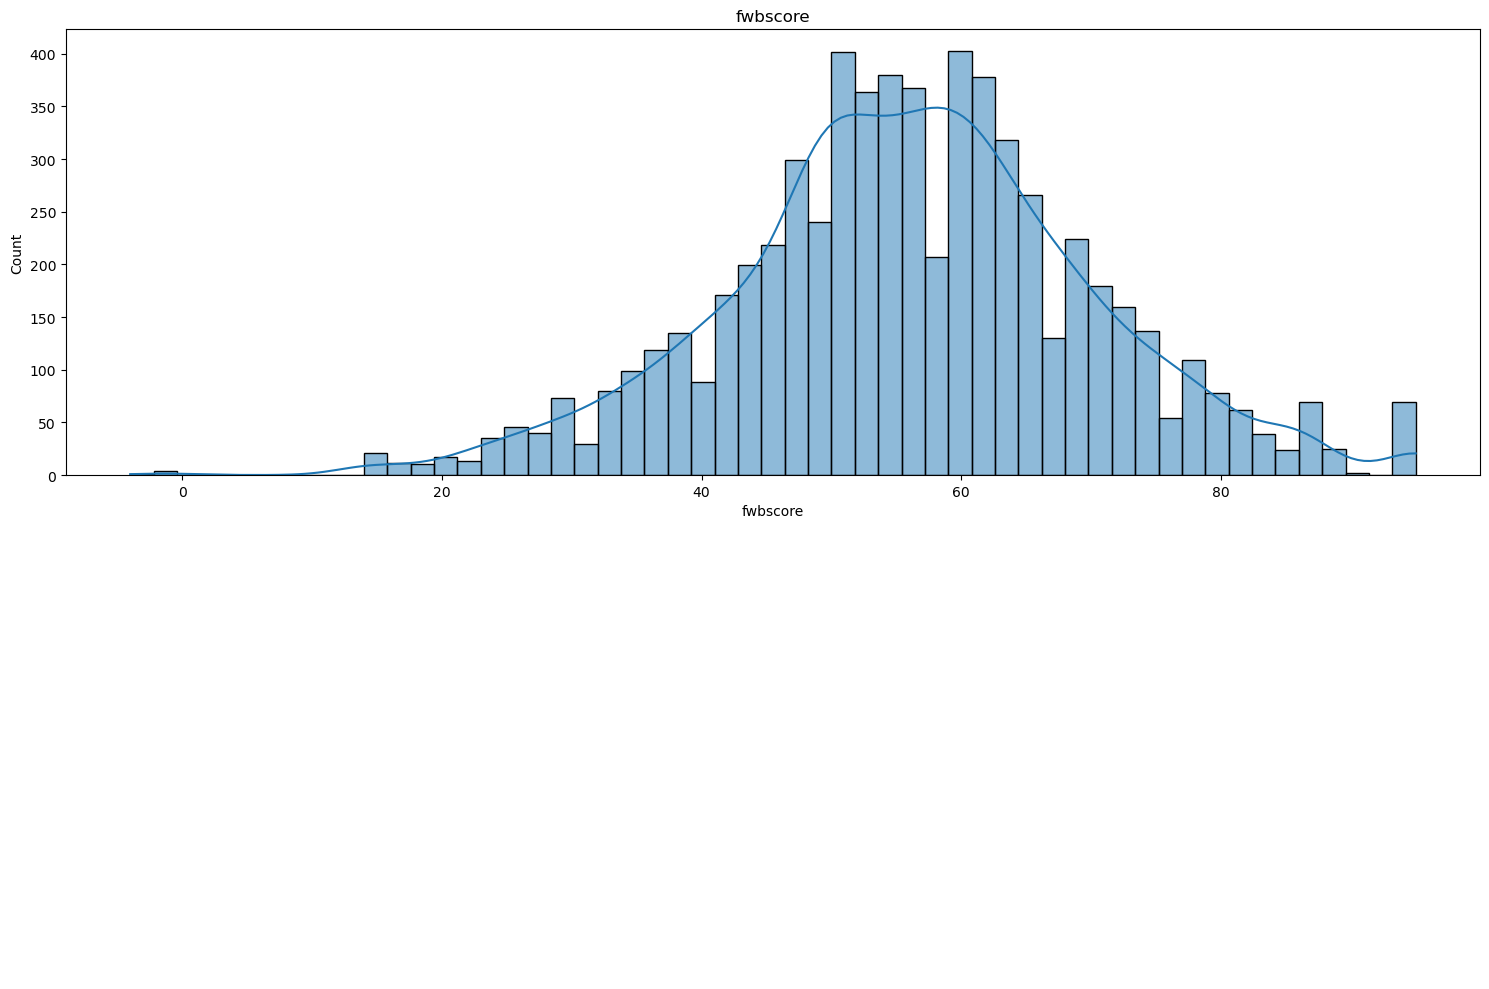

In [159]:
# Define the number of rows and columns for subplots
num_rows = len(num_attribs)+1
num_cols = (len(num_attribs) + num_rows - 1) // num_rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array to iterate over numerical attributes
axes = axes.flatten()

# Iterate over numerical attributes and plot histograms
for i, column in enumerate(num_attribs):
    sns.histplot(df[column], ax=axes[i], kde=True)
    axes[i].set_title(column)

# Hide empty subplots
for j in range(i+1, num_rows*num_cols):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

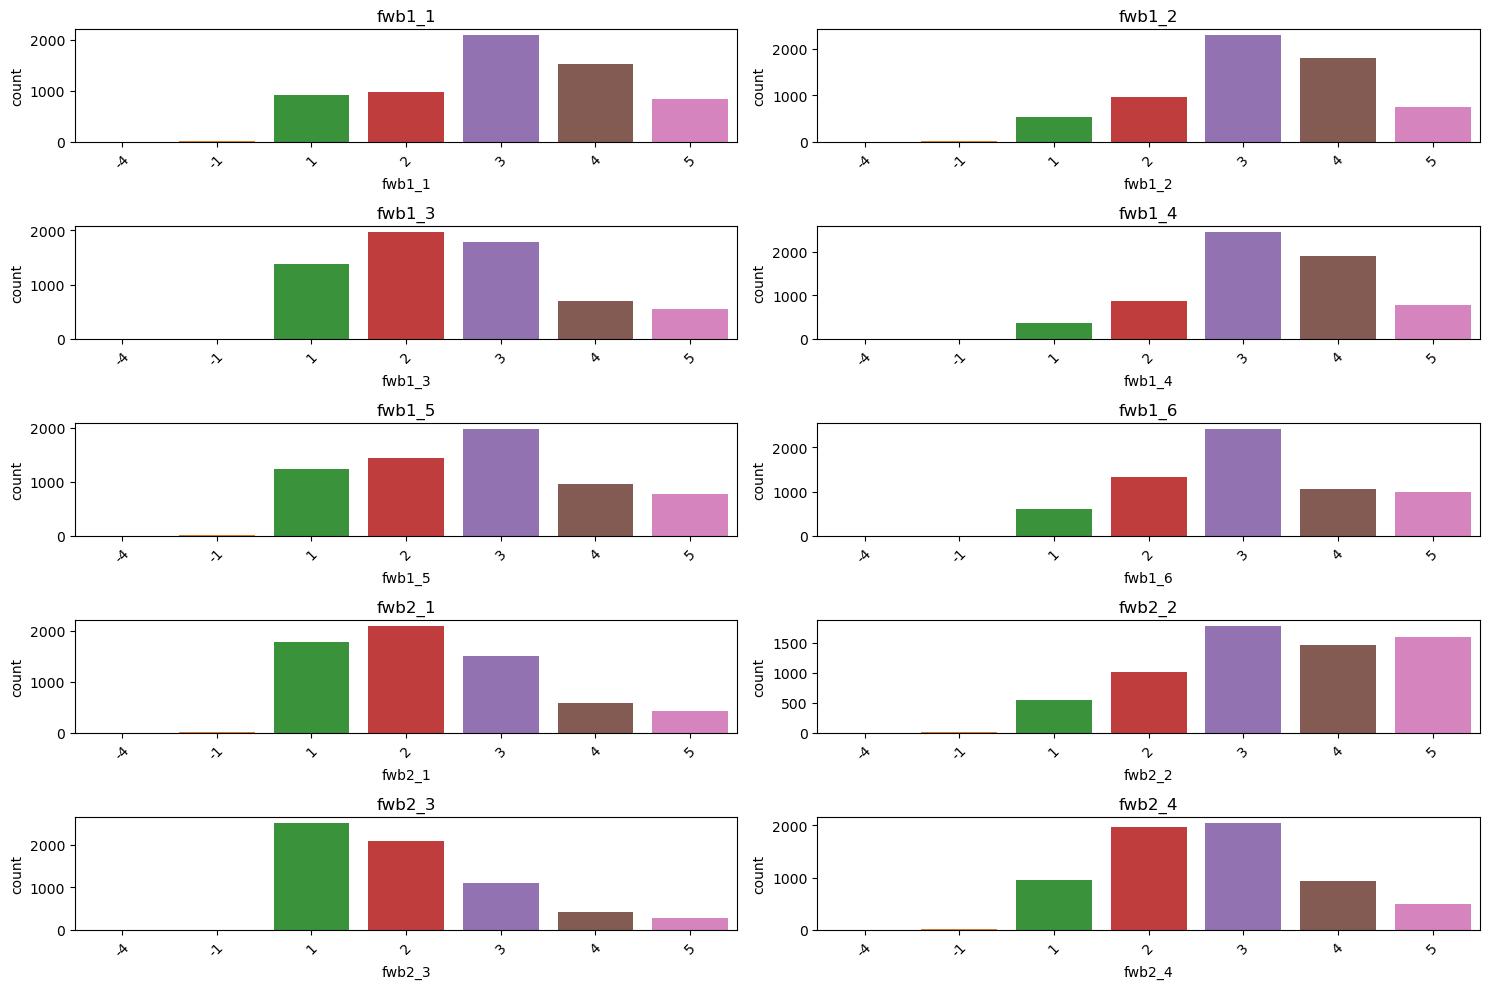

In [160]:
# Define the number of rows and columns for subplots
num_rows = 5
num_cols = (len(cat_attribs) + num_rows - 1) // num_rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array to iterate over binary attributes
axes = axes.flatten()

# Iterate over binary attributes and plot bar graphs
for i, column in enumerate(cat_attribs):
    sns.countplot(x=df[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees

# Hide empty subplots
for j in range(i+1, num_rows*num_cols):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

## 5.2 Bivariate

c:\Users\m.pham\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


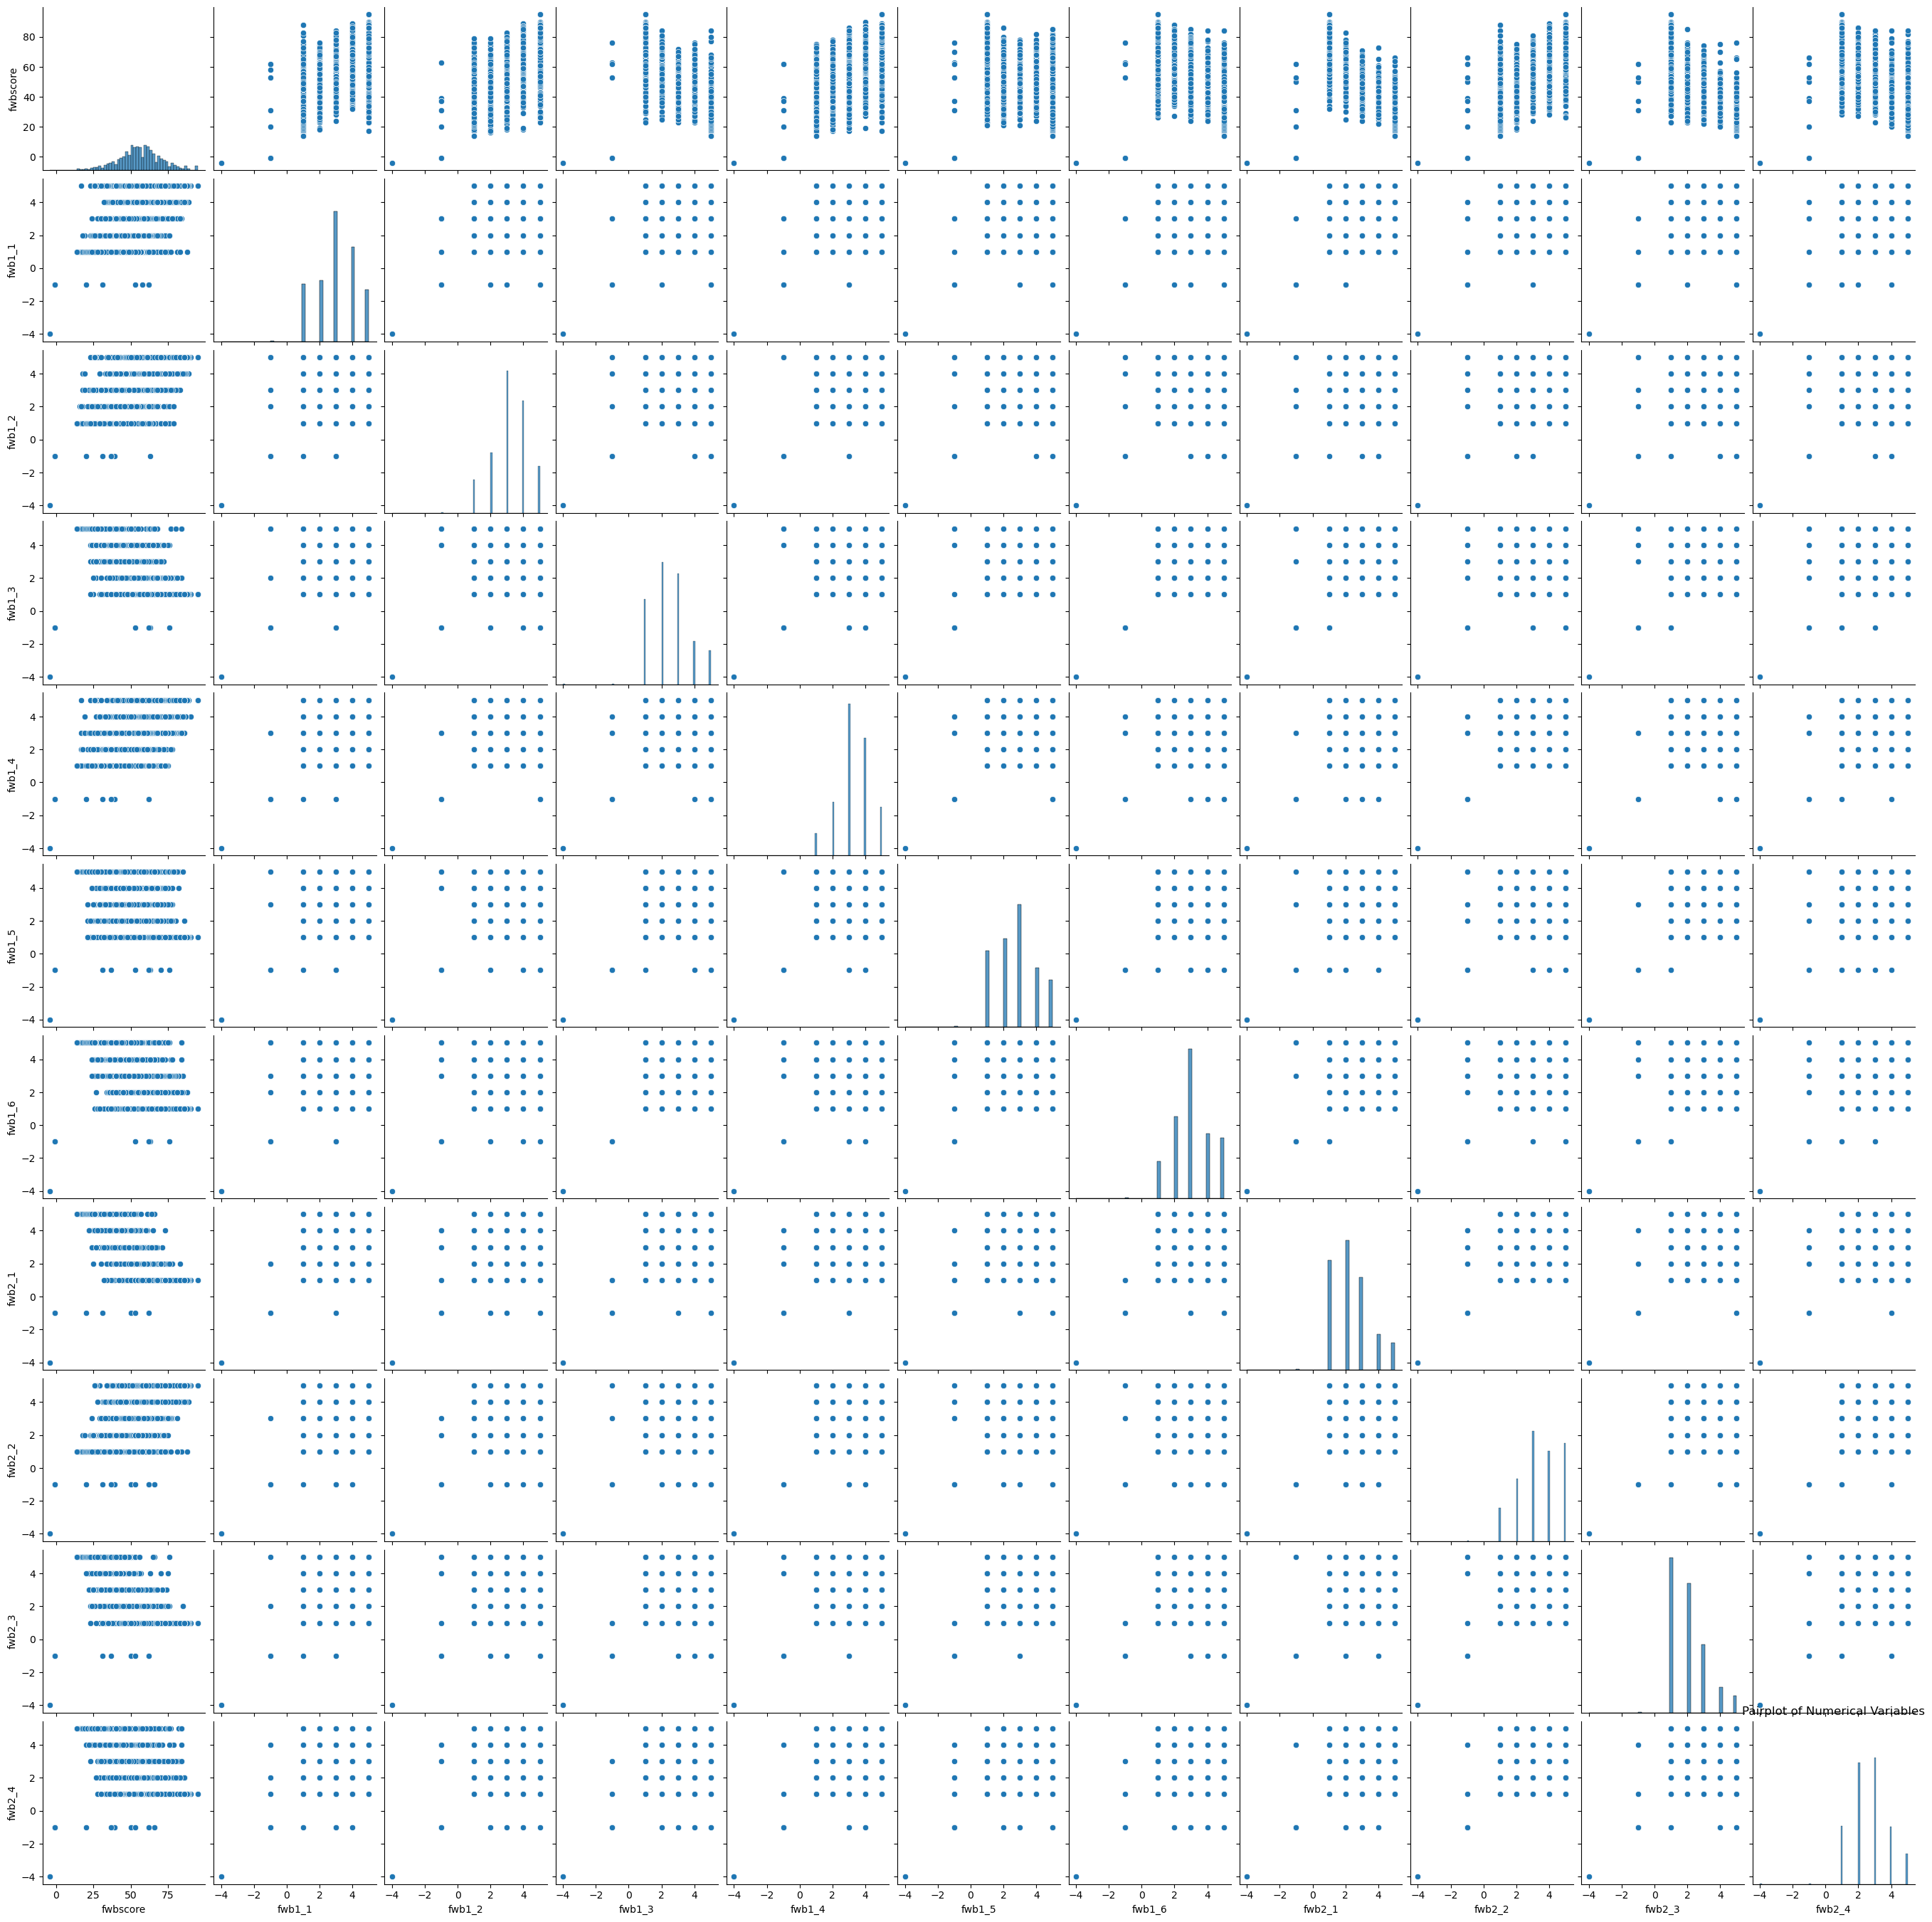

In [161]:
sns.pairplot(df[num_attribs+cat_attribs])
plt.title('Pairplot of Numerical Variables')
plt.show()

In [162]:
def plot_distribution_curves(df, columns, hue_columns):
    """
    Plot distribution curves for each column in the DataFrame
    with respect to the specified hue columns using different colors.

    Parameters:
        df (pandas.DataFrame): DataFrame containing the data.
        columns (list): List of columns to plot.
        hue_columns (list): List of columns to use for coloring the distribution curves.

    Returns:
        None
    """
    num_plots = len(columns) * len(hue_columns)
    fig, axes = plt.subplots(nrows=len(hue_columns), ncols=len(columns), figsize=(15, 40))
    axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

    for i, hue_col in enumerate(hue_columns):
        unique_values = df[hue_col].unique()
        colors = sns.color_palette("husl", len(unique_values))

        for j, col in enumerate(columns):
            for k, value in enumerate(unique_values):
                sns.kdeplot(data=df[df[hue_col] == value], x=col, color=colors[k], ax=axes[i*len(columns) + j])
            axes[i*len(columns) + j].set_title(f"Distribution of {col} by {hue_col}")
            axes[i*len(columns) + j].set_xlabel(col)
            axes[i*len(columns) + j].set_ylabel('Density')
            axes[i*len(columns) + j].legend(unique_values, title=hue_col)

    plt.tight_layout()
    plt.show()

In [163]:
num_attribs

['fwbscore']

C:\Users\m.pham\AppData\Local\Temp\ipykernel_21796\1403039401.py:24: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[df[hue_col] == value], x=col, color=colors[k], ax=axes[i*len(columns) + j])
C:\Users\m.pham\AppData\Local\Temp\ipykernel_21796\1403039401.py:24: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[df[hue_col] == value], x=col, color=colors[k], ax=axes[i*len(columns) + j])
C:\Users\m.pham\AppData\Local\Temp\ipykernel_21796\1403039401.py:24: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[df[hue_col] == value], x=col, color=colors[k], ax=axes[i*len(columns) + j])
C:\Users\m.pham\AppData\Local\Temp\ipykernel_21796\1403039401.py:24: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singula

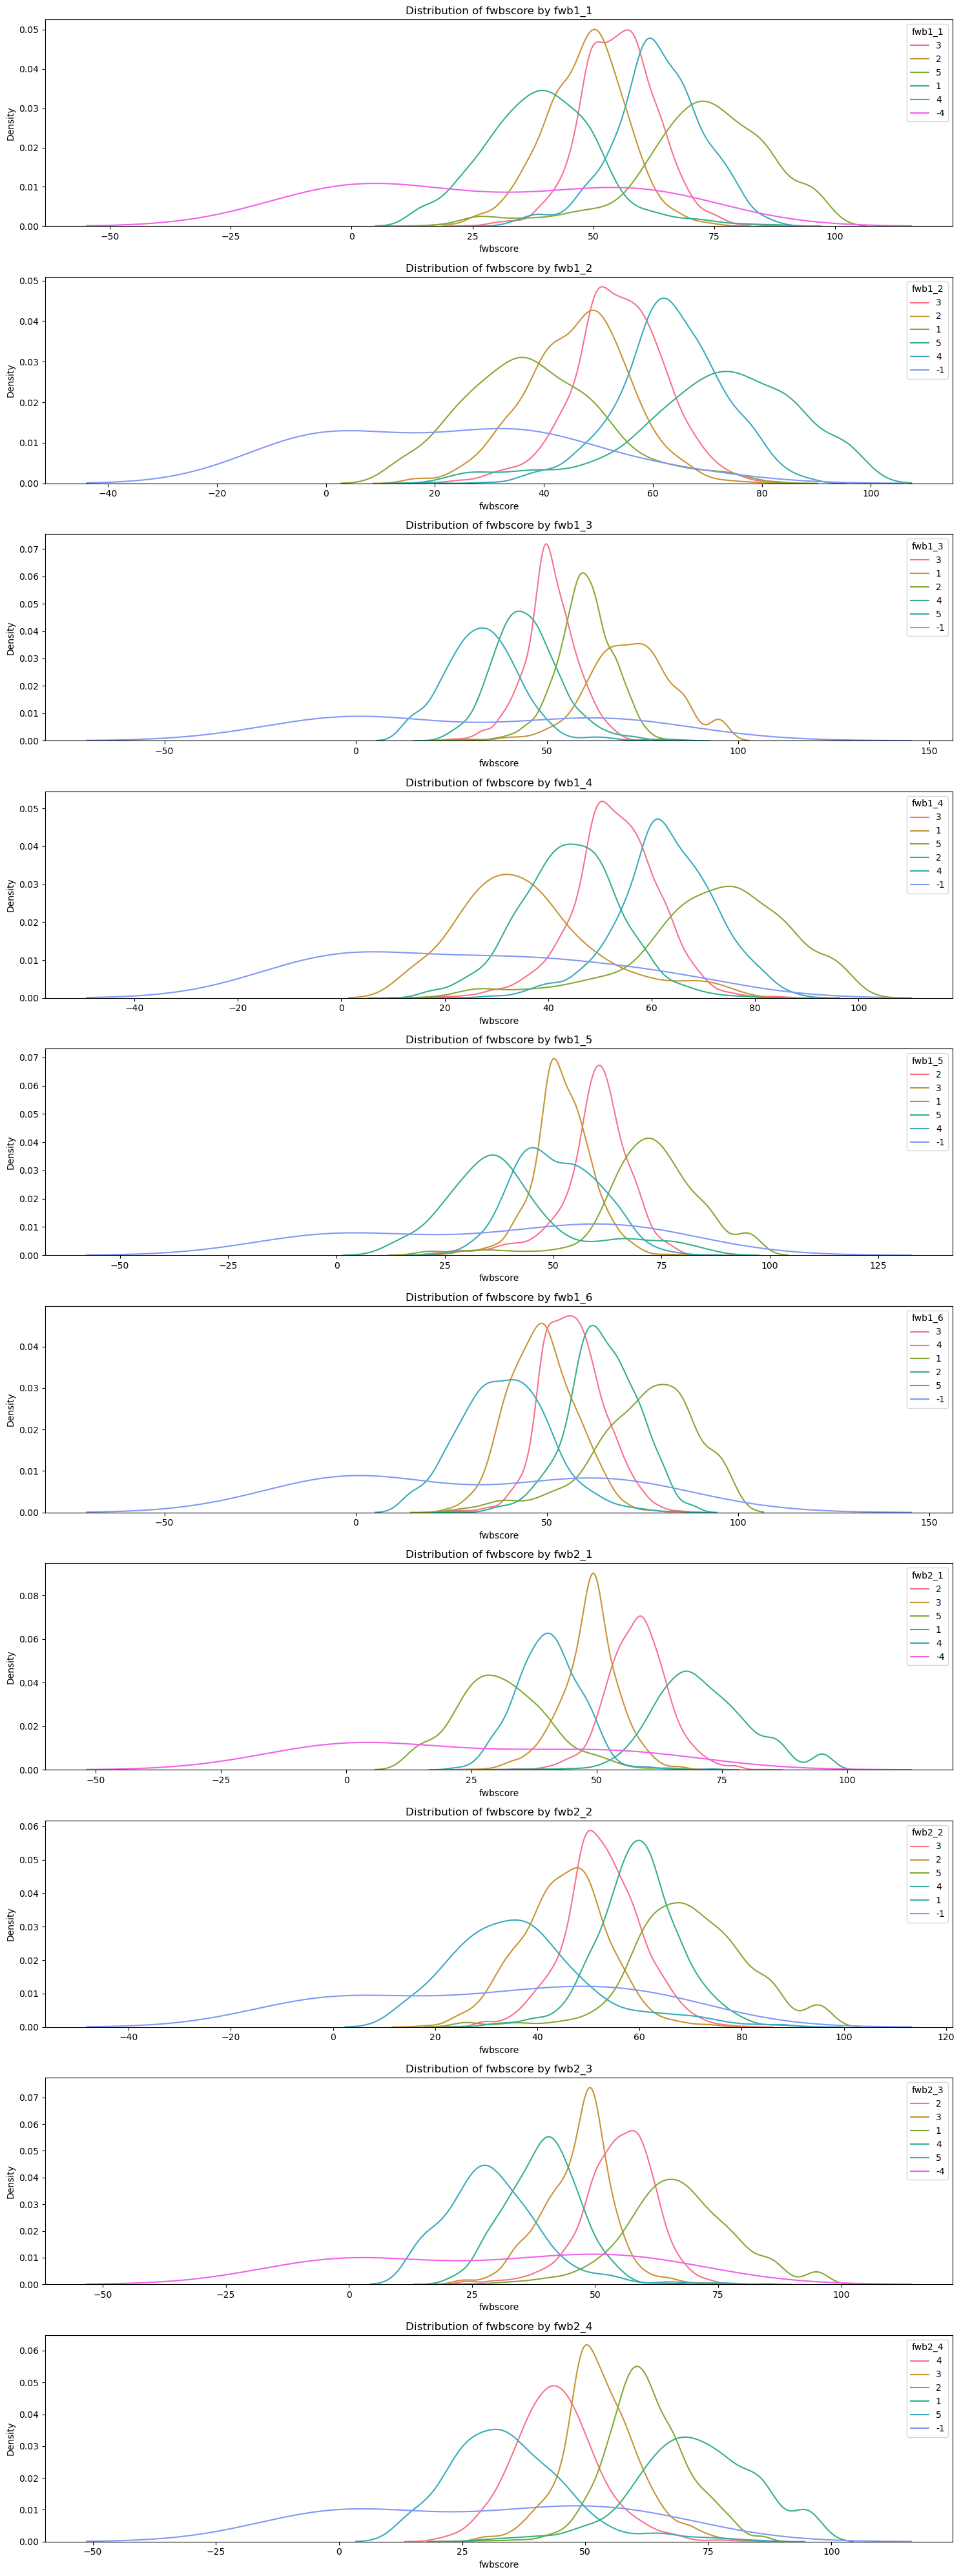

In [164]:
plot_distribution_curves(df, num_attribs, cat_attribs)

## 5.3 Multivariate

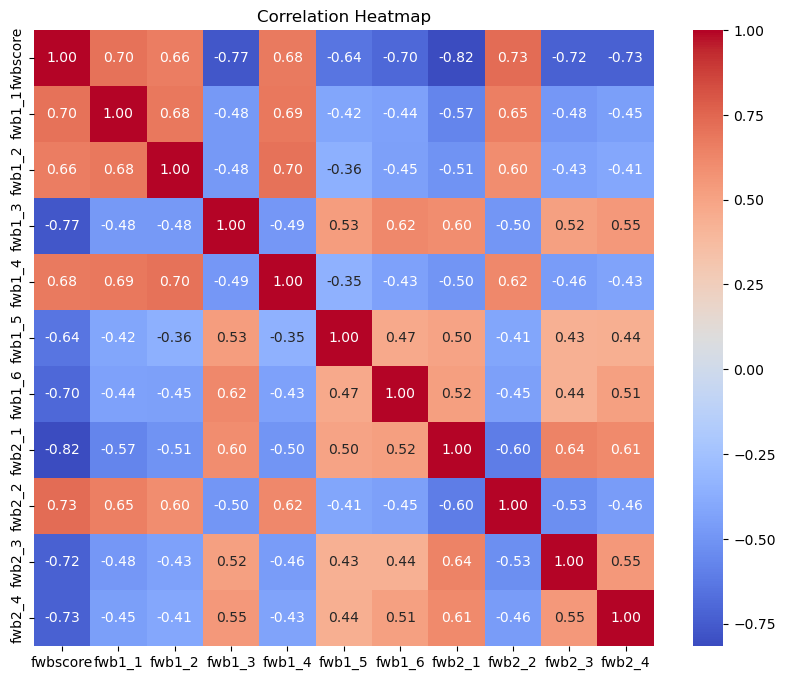

In [165]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_attribs+cat_attribs].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 6. Handle Labels (Optionals)
* Drop null labels
* Drop outlier labels

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6394 entries, 0 to 6393
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   fwbscore  6394 non-null   int64
 1   fwb1_1    6394 non-null   int64
 2   fwb1_2    6394 non-null   int64
 3   fwb1_3    6394 non-null   int64
 4   fwb1_4    6394 non-null   int64
 5   fwb1_5    6394 non-null   int64
 6   fwb1_6    6394 non-null   int64
 7   fwb2_1    6394 non-null   int64
 8   fwb2_2    6394 non-null   int64
 9   fwb2_3    6394 non-null   int64
 10  fwb2_4    6394 non-null   int64
dtypes: int64(11)
memory usage: 549.6 KB


In [183]:
df['fwb1_1'].unique()

array([ 3.,  2.,  5.,  1.,  4., nan])

In [187]:
def drop_negative_values(df):
    """
    Drop all values in the DataFrame that are less than 0.

    Parameters:
        df (pandas.DataFrame): Input DataFrame.

    Returns:
        pandas.DataFrame: DataFrame with negative values dropped.
    """
    df_without_null = df[df >= 0]
    print(len(df)-len(df_without_null.dropna()))
    return df_without_null.dropna()

In [188]:
df = drop_negative_values(df)

0


In [189]:
df.isnull().sum()

fwbscore    0
fwb1_1      0
fwb1_2      0
fwb1_3      0
fwb1_4      0
fwb1_5      0
fwb1_6      0
fwb2_1      0
fwb2_2      0
fwb2_3      0
fwb2_4      0
dtype: int64

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6375 entries, 0 to 6393
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fwbscore  6375 non-null   float64
 1   fwb1_1    6375 non-null   float64
 2   fwb1_2    6375 non-null   float64
 3   fwb1_3    6375 non-null   float64
 4   fwb1_4    6375 non-null   float64
 5   fwb1_5    6375 non-null   float64
 6   fwb1_6    6375 non-null   float64
 7   fwb2_1    6375 non-null   float64
 8   fwb2_2    6375 non-null   float64
 9   fwb2_3    6375 non-null   float64
 10  fwb2_4    6375 non-null   float64
dtypes: float64(11)
memory usage: 597.7 KB


# 7. Split Train Test For Modelling

In [191]:
target_column = [col for col in df.columns if 'score' in col.lower()]

In [192]:
target_column

['fwbscore']

In [197]:
num_attribs

[]

In [212]:
# num_attribs.remove(target_column)

In [213]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

train = train_set.drop(columns=target_column, errors='ignore')
train_labels = train_set[target_column]

test = test_set.drop(columns=target_column, errors='ignore')
test_labels = test_set[target_column]

# 8. Data Cleaning for Modelling

## 8.1 Handle Nulls

### 8.1.1 Types of NULLS

**Missing Completely at Random (MCAR)**
- Missing data is random
- Data was lost in ETL, someone was interrupted when completing a survey
- Remove or impute

**Missing at Random (MAR)**
- Missing data suggests something about something else observed
- Older (which we have in data) may have higher privacy concerns and not report income
- Remove or impute

**Missing Not at Random (MNAR)**
- Missing based on something not observed
- Self-selection bias: Depressed do not complete mental health surveys
- Advanced econometrics

**By Design:**
- Remove credit card data if birthdate is below a certain value

### 8.1.2 Solutions to handle Nulls 
- Get rid of the corresponding rows.
- Get rid of the whole attribute.
- Set the values to some value (zero, the mean, the median, etc.).
- Create a new column that have True for the non-null and False for null (or the opposite)

In [ ]:
# df.dropna(subset=["minimum_payments"]) # option 1
# df.drop("minimum_payments", axis=1) # option 2
# median = df["minimum_payments"].median() # option 3
# df["minimum_payments"].fillna(median, inplace=True) # option 4
# 

In [ ]:
# from sklearn.impute import SimpleImputer
# train_imputer = SimpleImputer(strategy="median")
# train_labels_imputer = SimpleImputer(strategy="median")

Fit train (non_labels)

In [ ]:
# train_imputer.fit(train_num)

SimpleImputer(strategy='median')

In [ ]:
# train_num.isnull().sum().sum()

14

In [ ]:
# train_imputer.statistics_


array([6.100000e+01, 5.000000e+00, 1.999000e+03, 6.473100e+04,
       1.100000e+02, 1.600000e+03, 5.000000e+00, 8.500000e+01,
       1.065000e+03, 3.000000e+00, 1.146825e+03, 1.000000e+00,
       0.000000e+00, 4.000000e+00, 0.000000e+00, 1.000000e+00,
       1.000000e+00, 1.000000e+00, 1.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
       1.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00])

In [ ]:
# train_num.median().values

array([6.100000e+01, 5.000000e+00, 1.999000e+03, 6.473100e+04,
       1.100000e+02, 1.600000e+03, 5.000000e+00, 8.500000e+01,
       1.065000e+03, 3.000000e+00, 1.146825e+03, 1.000000e+00,
       0.000000e+00, 4.000000e+00, 0.000000e+00, 1.000000e+00,
       1.000000e+00, 1.000000e+00, 1.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
       1.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00])

In [ ]:
# X = train_imputer.transform(train_num) # return Numpy value

In [ ]:
# train_num =  pd.DataFrame(X, columns=train_num.columns)


In [ ]:
# train_num.isnull().sum().sum()

0

Fit Labels

In [ ]:
# train_labels_imputer.fit(train_labels)

SimpleImputer(strategy='median')

In [ ]:
# train_labels_imputer.statistics_


array([9825.])

In [ ]:
# train_labels.isnull().sum()

price    3
dtype: int64

In [ ]:
# Y = train_labels_imputer.transform(train_labels) # return Numpy value

In [ ]:
# train_labels =  pd.DataFrame(Y, columns=train_labels.columns)


## 8.2 Handle Outliers

In [203]:
# num_rows = 3
# num_cols = len(num_attribs) // num_rows + (len(num_attribs) % num_rows > 0)

# fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))
# axes = axes.ravel()  # Flatten the axes array

# for i, col in enumerate(num_attribs):
#     ax = axes[i]
#     sns.boxplot(x=df[col], ax=ax, color='skyblue')  # Use seaborn's boxplot function
#     ax.set_title(f'Box plot for {col}')
#     ax.set_xlabel('Values')
#     ax.set_ylabel('')

# plt.tight_layout()
# plt.show()

In [204]:
# Remove Outlier
def remove_outliers(df, column_names=None):
    """
    Remove outliers from specific columns in the DataFrame based on the interquartile range (IQR) method,
    or remove outliers from all numerical columns if column_names is None.

    Parameters:
    - df: DataFrame
        The DataFrame containing the data.
    - column_names: list or None, default None
        The list of column names for which outliers are to be removed,
        or None to remove outliers from all numerical columns.

    Returns:
    - df_filtered: DataFrame
        The DataFrame with outliers removed.
    """
    if column_names is None:
        num_attribs = df.select_dtypes(include='number').columns
    else:
        num_attribs = column_names

    total_removed = 0
    total_rows = len(df)

    for col in num_attribs:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers from the specified column
        removed_rows = len(df) - len(df[(df[col] >= lower_bound) & (df[col] <= upper_bound)])
        total_removed += removed_rows

        # Update DataFrame
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

        # Print the number and percentage of removed values if any rows have been removed
        percentage_removed = (removed_rows / total_rows) * 100
        print(f"Removed {removed_rows} rows ({percentage_removed:.2f}%) due to outliers in column '{col}'.")

    return df

In [ ]:
# We are not handling any outlier in this case to see how the model perform

# 9.Preprocess Data 

## 9.1 Handle Categorical Data

## 9.2 Feature Scaling
* As with all the transformations, it is important to fit the scalers to the training data only, not to the full dataset (including the test set). Only then can you use them to transform the training set and the test set (and new data).

### 9.2.1 Min-Max Scailing (Normalization Scailing)
* Values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max minus the min
* Normalization are more affected by outliers

### 9.2.2 Standardization Scailing 
* First it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance
*  Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1)
* standardization is much less affected by outliers.

In [205]:
# Skip

## 9.3 Transformation Pipelines

In [206]:
# Skip

# 10. Select and Train a Model

## 10.1 Training and Evaluating on the Training Set

Linear Regression Model

In [207]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train, train_labels)

LinearRegression()

In [208]:
train_labels.iloc[:5]

,fwbscore
2204,55.0
473,62.0
3410,58.0
4234,62.0
1474,95.0


In [209]:
some_data = train.iloc[:5]
some_labels = train_labels.iloc[:5]
print("Predictions:", lin_reg.predict(some_data))
print("Labels:", np.array(some_labels))

Predictions: [[55.04387554]
 [63.15450918]
 [57.16653386]
 [67.89816812]
 [80.66820714]]
Labels: [[55.]
 [62.]
 [58.]
 [62.]
 [95.]]


In [217]:
from sklearn.metrics import mean_squared_error
predictions = lin_reg.predict(train)
lin_mse = mean_squared_error(np.array(train_labels), predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.8321200176317736

Decision Tree Regressor Model

In [219]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train, train_labels)

DecisionTreeRegressor()

In [220]:
predictions = tree_reg.predict(train)
tree_mse = mean_squared_error(train_labels, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


0.8129826302133111

Forest Regressor Model

In [222]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(train, train_labels)


c:\Users\m.pham\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [224]:
predictions = forest_reg.predict(train)
forest_mse = mean_squared_error(train_labels, predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

0.986949104998281


In [225]:
# # Compute residuals
# residuals = np.array(train_labels) - housing_predictions
# import statsmodels.api as sm

# # Plot QQ plot
# sm.qqplot(residuals, line='45')
# plt.title('QQ Plot of Residuals')
# plt.show()

ANN deep learning model

In [235]:
train_labels

,fwbscore
2204,55.0
473,62.0
3410,58.0
4234,62.0
1474,95.0
...,...
3780,62.0
5206,80.0
5241,46.0
5406,57.0


Epoch 1/100


128/128 [==============================] - 1s 2ms/step - loss: 1279.2633 - rmse: 31.7762 - val_loss: 202.1533 - val_rmse: 14.0532
Epoch 2/100
128/128 [==============================] - 0s 1ms/step - loss: 125.0020 - rmse: 10.9216 - val_loss: 87.8754 - val_rmse: 9.1742
Epoch 3/100
128/128 [==============================] - 0s 1ms/step - loss: 87.1999 - rmse: 9.1050 - val_loss: 81.7155 - val_rmse: 8.8427
Epoch 4/100
128/128 [==============================] - 0s 1ms/step - loss: 82.2921 - rmse: 8.8684 - val_loss: 77.3376 - val_rmse: 8.6046
Epoch 5/100
128/128 [==============================] - 0s 1ms/step - loss: 77.7448 - rmse: 8.6161 - val_loss: 71.7445 - val_rmse: 8.2904
Epoch 6/100
128/128 [==============================] - 0s 1ms/step - loss: 72.7761 - rmse: 8.3545 - val_loss: 65.9607 - val_rmse: 7.9539
Epoch 7/100
128/128 [==============================] - 0s 1ms/step - loss: 66.2734 - rmse: 7.9677 - val_loss: 60.2906 - val_rmse: 7.6075
Epoch 8/100
128/128 [=========================

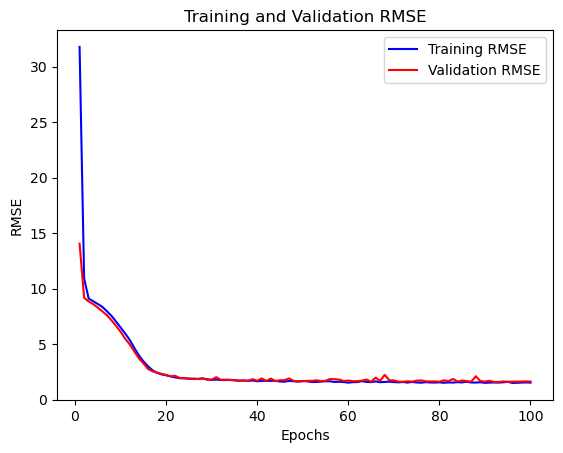

In [246]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a custom metric function for RMSE
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# Step 2: Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(train.shape[1],)),  # Input layer with 64 neurons and ReLU activation
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons and ReLU activation
    Dense(1)  # Output layer with 1 neuron (no activation function for regression)
])

# Step 3: Compile the model
model.compile(optimizer='adam', loss='mse', metrics=[rmse])  # Using MSE loss for regression and RMSE as a metric

# Step 4: Train the model
history = model.fit(train, train_labels, epochs=100, batch_size=32, validation_split=0.2)

# Extract RMSE values from history
train_rmse = history.history['rmse']
val_rmse = history.history['val_rmse']
epochs = range(1, len(train_rmse) + 1)

# Plot RMSE for training and validation data
plt.plot(epochs, train_rmse, 'b', label='Training RMSE')
plt.plot(epochs, val_rmse, 'r', label='Validation RMSE')
plt.title('Training and Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

Potentially Saving the model for future usage

In [ ]:
import joblib

In [ ]:
# # Save the trained model to a file
# joblib.dump(forest_reg, "forest_reg.pkl")

# # Later, when you want to use the model again
# # Load the model from the file
# forest_reg = joblib.load("forest_reg.pkl")

Could this model really be absolutely perfect? Of course,
it is much more likely that the model has badly overfit the data. How can you be sure?
As we saw earlier, you don’t want to touch the test set until you are ready to launch a
model you are confident about, so you need to use part of the training set for train‐
ing, and part for model validation

## 10.2 Better Evaluation Using Cross-Validation

In [250]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(tree_reg, train, train_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)


In [228]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [2.34679805 2.48776901 2.37469705 2.5756952  2.48880412 2.46896083
 2.26843298 2.71072536 2.76419846 2.89679213]
Mean: 2.538287319765377
Standard deviation: 0.1888793008219372


In [229]:
lin_scores = cross_val_score(lin_reg, train, train_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


Scores: [2.7591169  2.81719053 2.69408479 2.89161287 3.11142801 2.85048284
 2.66795585 2.72331682 2.66914356 3.14585575]
Mean: 2.8330187934266045
Standard deviation: 0.16439798926184856


In [230]:
forest_scores = cross_val_score(forest_reg, train, train_labels,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)


c:\Users\m.pham\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\m.pham\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\m.pham\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\m.pham\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was

Scores: [1.67803376 1.67434865 1.74880366 1.64014073 1.88549268 1.77771076
 1.61220968 1.72542784 2.11044882 1.98122   ]
Mean: 1.7833836579216205
Standard deviation: 0.15294777896278802


In [276]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [275]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# from scikeras.wrappers import KerasClassifier
import numpy as np

# Define a function to create the model
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(train.shape[1],)),  # Input layer with 64 neurons and ReLU activation
        Dense(32, activation='relu'),  # Hidden layer with 32 neurons and ReLU activation
        Dense(1)  # Output layer with 1 neuron (no activation function for regression)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])  # Using MSE loss for regression and MSE as a metric
    return model

# Assuming train and train_labels are defined (e.g., train is a pandas DataFrame, train_labels is a pandas Series)
# Perform k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = []
for train_indices, val_indices in kfold.split(train):
    X_train, X_val = train.iloc[train_indices], train.iloc[val_indices]
    y_train, y_val = train_labels.iloc[train_indices], train_labels.iloc[val_indices]
    model = create_model()
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=0)
    # Evaluate the model on validation data
    mse = model.evaluate(X_val, y_val, verbose=0)[0]
    mse_scores.append(mse)

# Display MSE scores
print("MSE scores:", mse_scores)
print("Mean MSE:", np.mean(mse_scores))
print("Root Mean Squared Error (RMSE):", np.sqrt(np.mean(mse_scores)))

KeyboardInterrupt: 

In [279]:
def create_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train.shape[1],)),
        BatchNormalization(),
        Dropout(0.2),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(1)
    ])
    
    optimizer = Adam(lr=0.001)  # Specify the learning rate using the lr parameter
    
    model.compile(optimizer='adam', loss='mse', metrics=['mse', rmse])  # Using MSE loss for regression and RMSE as a metric
    return model

# Assuming train and train_labels are defined (e.g., train is a pandas DataFrame, train_labels is a pandas Series)
# Perform k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = []
for train_indices, val_indices in kfold.split(train):
    X_train, X_val = train.iloc[train_indices], train.iloc[val_indices]
    y_train, y_val = train_labels.iloc[train_indices], train_labels.iloc[val_indices]
    model = create_model()
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=0)
    # Evaluate the model on validation data
    mse = model.evaluate(X_val, y_val, verbose=0)[0]
    mse_scores.append(mse)

# Display MSE scores
print("MSE scores:", mse_scores)
print("Mean MSE:", np.mean(mse_scores))
print("Root Mean Squared Error (RMSE):", np.sqrt(np.mean(mse_scores)))

The score on the training set is still much lower than on the validation sets, meaning that the model is still overfitting the training set. The solution include:
* Simplify the model
* Constrain it (i.e., regularize it)
* Get a lot more training data

Try others ML models, the goal is to shortlist 2-5 promising models

# 11. Fine Tune Your Model

## 11.1 Grid Search
One way to do that would be to fiddle with the hyperparameters manually, until you find a great combination of hyperparameter values. This would be very tedious work, and you may not have time to explore many combinations.


Instead you should get Scikit-Learn’s GridSearchCV to search for you. All you need to do is tell it which hyperparameters you want it to experiment with, and what values to try out, and it will evaluate all the possible combinations of hyperparameter values, using cross-validation.

In [269]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [5, 25, 50], 'max_features': [5, 10, 15, 25]},
 {'bootstrap': [False], 'n_estimators': [5, 10], 'max_features': [5, 10, 15]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(train, train_labels)


c:\Users\m.pham\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\m.pham\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\m.pham\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\m.pham\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [5, 10, 15, 25],
                          'n_estimators': [5, 25, 50]},
                         {'bootstrap': [False], 'max_features': [5, 10, 15],
                          'n_estimators': [5, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [270]:
GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(train, train_labels)


c:\Users\m.pham\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\m.pham\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\m.pham\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\m.pham\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [5, 10, 15, 25],
                          'n_estimators': [5, 25, 50]},
                         {'bootstrap': [False], 'max_features': [5, 10, 15],
                          'n_estimators': [5, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

This param_grid tells Scikit-Learn to first evaluate all 3 × 4 = 12 combinations of n_estimators and max_features hyperparameter values specified in the first dict. It will then try all 2 × 3 = 6 combinations of hyperparameter values in the second dict, but this time with the bootstrap hyperparameter set to False instead of True (which is the default value for this hyperparameter)

In [271]:
grid_search.best_params_


{'max_features': 5, 'n_estimators': 50}

In [272]:
grid_search.best_estimator_

RandomForestRegressor(max_features=5, n_estimators=50)

In [273]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


1.906860229744576 {'max_features': 5, 'n_estimators': 5}
1.6566067835654221 {'max_features': 5, 'n_estimators': 25}
1.6285105799344148 {'max_features': 5, 'n_estimators': 50}
2.0409313745753526 {'max_features': 10, 'n_estimators': 5}
1.8259630069150674 {'max_features': 10, 'n_estimators': 25}
1.81454631969528 {'max_features': 10, 'n_estimators': 50}
2.0260108989778502 {'max_features': 15, 'n_estimators': 5}
1.8464657081607823 {'max_features': 15, 'n_estimators': 25}
1.7895675141048206 {'max_features': 15, 'n_estimators': 50}
1.9921366392992 {'max_features': 25, 'n_estimators': 5}
1.838587188393155 {'max_features': 25, 'n_estimators': 25}
1.802495920378187 {'max_features': 25, 'n_estimators': 50}
1.8616534006650862 {'bootstrap': False, 'max_features': 5, 'n_estimators': 5}
1.7897126426801253 {'bootstrap': False, 'max_features': 5, 'n_estimators': 10}
2.4854421555629345 {'bootstrap': False, 'max_features': 10, 'n_estimators': 5}
2.480122982697213 {'bootstrap': False, 'max_features': 10, 

Non of the fine tune model are as good as the orininal one

## 11.2 Randomized Search
Better when the hyperparameter space is large. This approach is the same way as the GridSearchCV class, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. This approach has two main benefits:
* If you let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000 different values for each hyperparameter (instead of just a few values per hyperparameter with the grid search approach).
* You have more control over the computing budget you want to allocate to hyperparameter search, simply by setting the number of iterations


## 11.3 Ensemble Methods
Another way to fine-tune your system is to try to combine the models that perform best. The group (or “ensemble”) will often perform better than the best individual model (just like Random Forests perform better than the individual Decision Trees they rely on), especially if the individual models make very different types of errors.

# 12. Analyze Model and Explain Features important

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.77799626e-01, 1.02324938e-02, 1.79121192e-01, 8.59245806e-02,
       2.81404125e-02, 1.03944066e-02, 7.92465453e-04, 2.23076409e-02,
       5.70322341e-02, 9.37353732e-03, 2.09425520e-02, 3.15666358e-03,
       1.06427406e-03, 0.00000000e+00, 5.25713255e-03, 1.31823293e-03,
       1.18021383e-02, 7.60030745e-04, 7.60357907e-03, 2.02928866e-02,
       4.46844111e-02, 5.82304059e-02, 5.78167190e-02, 1.40418256e-02,
       1.30988968e-02, 5.23578731e-04, 1.95668943e-03, 5.32968356e-03,
       1.09843384e-02, 2.94450942e-03, 5.17488859e-03, 2.17457948e-03,
       3.67360976e-06, 4.39536758e-03, 2.21869143e-05, 1.07303710e-04,
       1.54463232e-04, 2.93278930e-06, 4.11965118e-05, 6.01523534e-05,
       1.83285552e-04, 4.43245494e-05, 1.31257189e-03, 6.47400490e-05,
       9.56865646e-05, 3.69183575e-06, 3.39385980e-04, 5.72742310e-05,
       3.92890938e-04, 5.11676850e-05, 5.00426318e-06, 1.23986219e-05,
       2.02546953e-04, 4.36265986e-05, 1.06637589e-04, 5.02121932e-05,
      

# 13 Evaluate Your System on the Test Set
Now is the time to evaluate the final model on the test set. There is nothing special about this process; just get the predictors and the labels from your test set, run your full_pipeline to transform the data (call `transform`, not `fit_transform()`, you do not want to fit the test set!), and evaluate the final model on the test set:


In [ ]:
final_model = forest_reg

In [ ]:
test_set

,id,model,price,age_08_04,mfg_month,mfg_year,km,fuel_type,hp,met_color,color,automatic,cc,doors,cylinders,gears,quarterly_tax,weight,mfr_guarantee,bovag_guarantee,guarantee_period,abs,airbag_1,airbag_2,airco,automatic_airco,boardcomputer,cd_player,central_lock,powered_windows,power_steering,radio,mistlamps,sport_model,backseat_divider,metallic_rim,radio_cassette,parking_assistant,tow_bar,version,km_per_year
594,598,Corolla 1.4 16V VVT I HATCHB TERRA 2/3-Doors,10800.0,50.0,7,2000,22500.0,Petrol,97,1,Green,0,1400,2/3-Doors,4,5,69,1025,0,1,3,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1.4,450.000000
754,758,Corolla 1.6 16V HATCHB LINEA LUNA 2/3-Doors,9950.0,68.0,1,1999,80426.0,Petrol,110,1,Green,0,1600,2/3-Doors,4,5,85,1055,1,1,3,1,1,1,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,1.6,1182.735294
630,634,Corolla 2.0D XL Sedan 4/5-Doors,7500.0,59.0,10,1999,130000.0,Diesel,72,1,Grey,0,2000,4/5-Doors,4,5,185,1135,0,1,3,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,NaN,2203.389831
1259,1266,Corolla 1.6 16V LIFTB LINEA TERRA 4/5-Doors,9250.0,71.0,10,1998,76000.0,Petrol,110,1,Blue,0,1600,4/5-Doors,4,5,85,1070,0,1,3,1,1,1,1,0,0,0,1,1,1,0,0,0,1,0,0,0,1,1.6,1070.422535
903,907,Corolla 1.6 VVTi Linea Luna Lift 4/5-Doors,9750.0,65.0,4,1999,59000.0,Petrol,110,0,Green,0,1600,4/5-Doors,4,5,19,1075,0,0,12,1,1,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1.6,907.692308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,564,Corolla 1.6 16V VVT I HATCHB TERRA 2/3-Doors,10950.0,54.0,3,2000,39291.0,Petrol,110,1,Green,0,1600,2/3-Doors,4,5,69,1040,0,1,3,0,1,1,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1.6,727.611111
156,158,Corolla 1.6 16V VVT I SEDAN SOL 4/5-Doors,19500.0,16.0,5,2003,13000.0,Petrol,110,1,Grey,0,1600,4/5-Doors,4,5,85,1105,1,1,3,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,1.6,812.500000
618,622,Corolla 1.6 16V G6 2/3-Doors,8450.0,64.0,5,1999,144000.0,CNG,110,1,Black,0,1600,2/3-Doors,4,6,72,1065,0,1,3,0,0,0,1,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1.6,2250.000000
934,938,Corolla 1.3 Hatchback 2/3-Doors,8950.0,65.0,4,1999,55000.0,Petrol,86,1,Silver,0,1300,2/3-Doors,4,5,69,1015,0,0,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.3,846.153846


In [ ]:
test = test_set.drop("price", axis=1)
test_labels = test_set["price"].copy()

test_prepared = full_pipeline.transform(test)
test_labels = train_labels_imputer.transform(test_labels.values.reshape(-1, 1))

final_model.fit(test_prepared, test_labels)
final_predictions = final_model .predict(test_prepared)
final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)

c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
print(final_rmse)

472.5303641525819


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=32262d87-0112-4aca-8334-f1fef4039a3d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>